It is highly recommended to use a powerful **GPU**, you can use it for free uploading this notebook to [Google Colab](https://colab.research.google.com/notebooks/intro.ipynb).

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/antoniotrapote/intro_deep_learning/blob/main/notebooks/CNN/Introduction_to_CNN.ipynb)
[![View on GitHub](https://img.shields.io/badge/View_on-GitHub-black?logo=github)](https://github.com/antoniotrapote/intro_deep_learning/blob/main/notebooks/CNN/Introduction_to_CNN.ipynb)




<a id='Image Filtering'></a>
# Image Filtering

In [4]:
## if you have a GPU
GPU=True
#%tensorflow_version 2.x
import tensorflow as tf
if GPU:
    device_name = tf.test.gpu_device_name()
    if device_name != '/device:GPU:0':
        raise SystemError('GPU device not found')
    print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [5]:
!pip install opencv-python

In [6]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
tf.random.set_seed(0)

**Load the example image.**

You can download the image with an image url using [get_file](https://www.tensorflow.org/api_docs/python/tf/keras/utils/get_file)
```python
tf.keras.utils.get_file(
    fname, origin, untar=False, md5_hash=None, file_hash=None,
    cache_subdir='datasets', hash_algorithm='auto',
    extract=False, archive_format='auto', cache_dir=None
)
```

In [8]:
import requests
from io import BytesIO
from PIL import Image
import numpy as np

# URL directa a la imagen RAW en GitHub
url = "https://www.rollingstone.com/wp-content/uploads/2018/11/jimi-hendrix-performing-in-1969.jpg?w=1581&h=1054&crop=1"

# Hacer la petición HTTP
response = requests.get(url)

# Verificar que la respuesta fue exitosa
if response.status_code == 200:
    # Abrir la imagen desde los bytes
    image = Image.open(BytesIO(response.content))
    image = image.convert("RGB")  # Por si acaso tiene canal alfa
    image = np.array(image)
    print("Imagen cargada correctamente. Shape:", image.shape)
else:
    print("Error al descargar la imagen:", response.status_code)

Imagen cargada correctamente. Shape: (1054, 1581, 3)


We can see that the dimensions of the image are (468, 468, 3).

That is, the image has a resolution of **468x468 pixels**, with **3 color channels (Red, Green and Blue)**.

In [9]:
image.shape

(1054, 1581, 3)

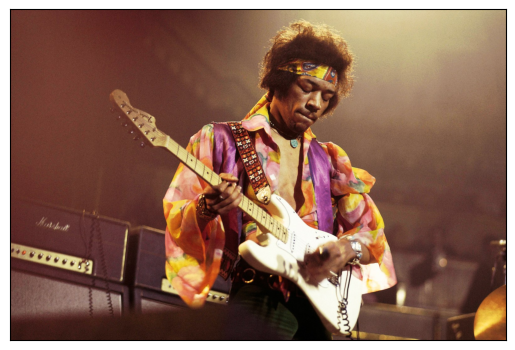

In [10]:
plt.imshow(image)
plt.xticks([])
plt.yticks([])
plt.show()

### Convolution examples

The following kernel performs the identity operation. The result of the convolution returns the original image.

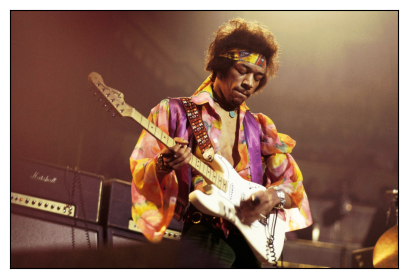

In [11]:
identity_kernel = np.array([
    [0, 0, 0],
    [0, 1, 0],
    [0, 0, 0]
])

img = cv2.filter2D(image, -1, identity_kernel)

fig, ax = plt.subplots(1, figsize=(5, 5))
ax.set_xticks([])
ax.set_yticks([])
plt.imshow(img);

The following filter applies the [Box Blur] (https://en.wikipedia.org/wiki/Box_blur), where each pixel of the resulting image has a value equal to the mean of its pixel values neighbors.

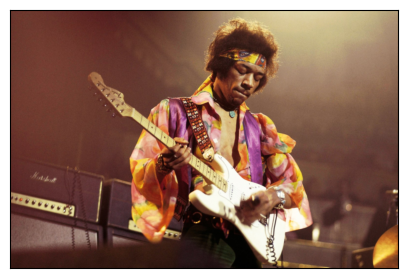

In [12]:
box_blur_filter = (1/9) * np.array([
    [1, 1, 1],
    [1, 1, 1],
    [1, 1, 1]
])

img = cv2.filter2D(image, -1, box_blur_filter)

fig, ax = plt.subplots(1, figsize=(5, 5))
ax.set_xticks([])
ax.set_yticks([])
plt.imshow(img);

The following example shows a filter widely used in digital image processing: the [Gaussian filtering] (https://en.wikipedia.org/wiki/Gaussian_blur).

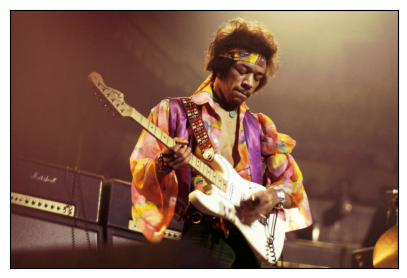

In [13]:
gaussian_blur_filter = (1/16) * np.array([
    [1, 2, 1],
    [2, 4, 2],
    [1, 2, 1]
])

img = cv2.filter2D(image, -1, gaussian_blur_filter)

fig, ax = plt.subplots(1, figsize=(5, 5))
ax.set_xticks([])
ax.set_yticks([])

plt.imshow(img);

We can gaussian noise to the image and see the effects

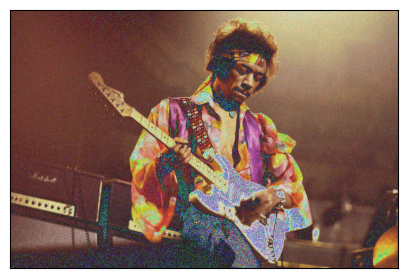

In [14]:
sigma = 20
n, m, k = image.shape
img_noise = img + sigma*np.random.randn(n, m, k)
fig, ax = plt.subplots(1, figsize=(5, 5))
ax.set_xticks([])
ax.set_yticks([])

plt.imshow(img_noise.astype(np.uint8));

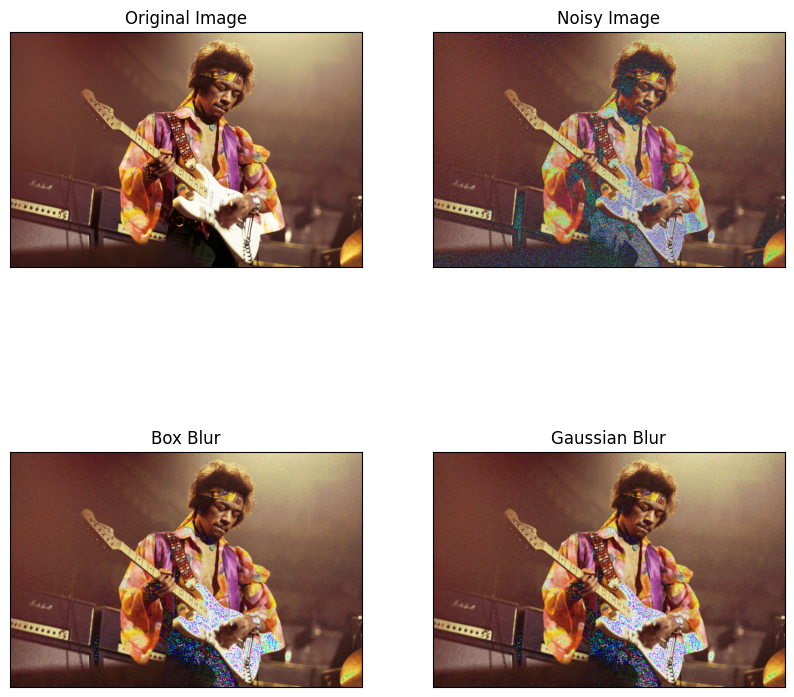

In [15]:
img1 = cv2.filter2D(img_noise, -1, gaussian_blur_filter)

fig, ax = plt.subplots(2, 2, figsize=(10, 10))

for i in range(ax.shape[0]):
    for j in range(ax.shape[1]):
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])

ax[0, 0].set_title('Original Image')
ax[0, 0].imshow(image.astype(np.uint8));

ax[0, 1].set_title('Noisy Image')
ax[0, 1].imshow(img_noise.astype(np.uint8));

ax[1, 0].set_title('Box Blur')
ax[1, 0].imshow(cv2.filter2D(img_noise, -1, box_blur_filter).astype(np.uint8));

ax[1, 1].set_title('Gaussian Blur')
ax[1, 1].imshow(cv2.filter2D(img_noise, -1, gaussian_blur_filter).astype(np.uint8));

The following filter is used for edge detection in images.

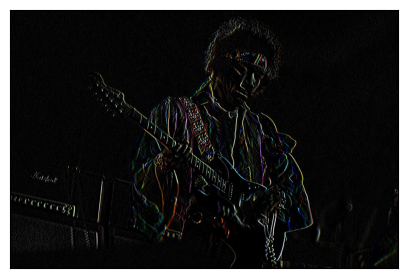

In [16]:
# vertical edge detection
edge_detection_filter = np.array([
    [1, 0, -1],
    [1, 0, -1],
    [1, 0, -1]
])

img = cv2.filter2D(image, -1, edge_detection_filter)

fig, ax = plt.subplots(1, figsize=(5, 5))
plt.xticks([])
plt.yticks([])

plt.imshow(img);

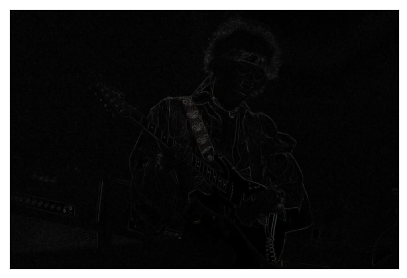

In [27]:
edge_detection_filter = np.array([
    [0, 1, 0],
    [1, -4, 1],
    [0, 1, 0]
])

img = cv2.filter2D(image, -1, edge_detection_filter)

fig, ax = plt.subplots(1, figsize=(5, 5))
plt.xticks([])
plt.yticks([])

plt.imshow(img);

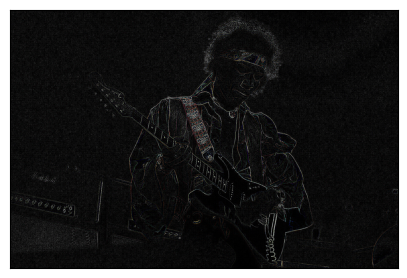

In [22]:
edge_detection_filter = np.array([
    [1, 1, 1],
    [1, -8, 1],
    [1, 1, 1]
])

img = cv2.filter2D(image, -1, edge_detection_filter)

fig, ax = plt.subplots(1, figsize=(5, 5))
plt.xticks([])
plt.yticks([])

plt.imshow(img);

The following filter allows you to highlight the edges of the image by increasing its contrast. The filter is the result of subtracting the matrix of an edge detection filter from the matrix of an identity filter:

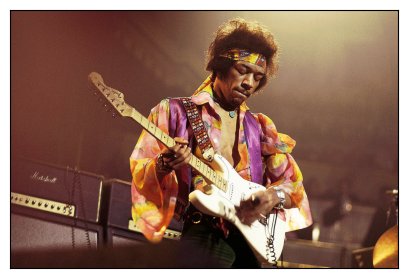

In [28]:
sharpen_flter = np.array([
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]
])

img = cv2.filter2D(image, -1, sharpen_flter)

fig, ax = plt.subplots(1, figsize=(5, 5))
plt.xticks([])
plt.yticks([])
plt.imshow(img);

OpenCV provides a multitude of techniques for digital image processing. Other examples of filters that we can apply to images are, for example, those that allow us to perform [morphological transformations](https://docs.opencv.org/4.x/d9/d61/tutorial_py_morphological_ops.html).

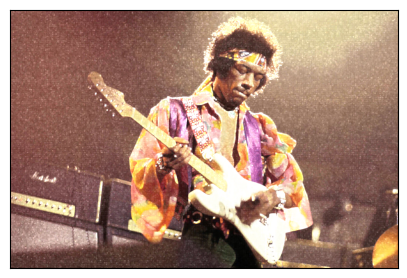

In [30]:
kernel = np.ones((5, 5), np.uint8)
dilation = cv2.dilate(img, kernel, iterations=1)


fig, ax = plt.subplots(1, figsize=(5, 5))
plt.xticks([])
plt.yticks([])
plt.imshow(dilation)

<a id='image_classification_cnn'></a>
# Image Classification CNN

In this section we will study the problem of classifying images with convolutional neural networks (CNN). To do this, we will rely on the [TensorFlow tutorial](https://www.tensorflow.org/tutorials/images/classification).

We will start with the download of the dataset. We will work with a set of **~ 3700 photographs** of flowers from **5 different classes**.

In [31]:
import pathlib
import os
import tensorflow as tf
dataset_url = 'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz'
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

# Check the directory structure
contents = os.listdir(data_dir)
if 'flower_photos' in contents and len(contents) == 1:
    # We're in Colab - need to go one level deeper
    data_dir = os.path.join(data_dir, 'flower_photos')
    data_dir = pathlib.Path(data_dir)

# At this point, data_dir should directly contain the flower categories
print(os.listdir(data_dir))  # Should now show 'roses', 'daisy', etc. in both environments

228813984/228813984 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
['LICENSE.txt', 'daisy', 'dandelion', 'sunflowers', 'tulips', 'roses']


We check that we have all the photographs.

In [32]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


Visualize some of them

In [33]:
roses = list(data_dir.glob('roses/*'))
sunflowers = list(data_dir.glob('sunflowers/*'))

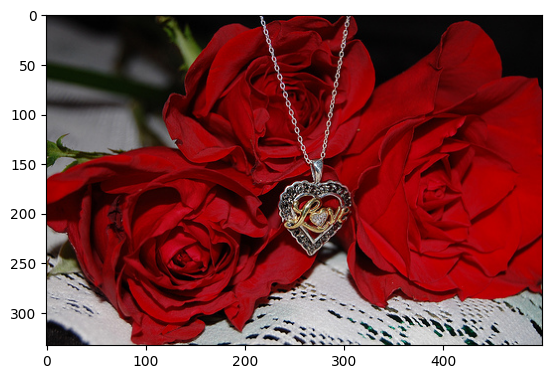

In [40]:
im = Image.open(str(roses[np.random.randint(0, len(roses))]))
plt.imshow(im)

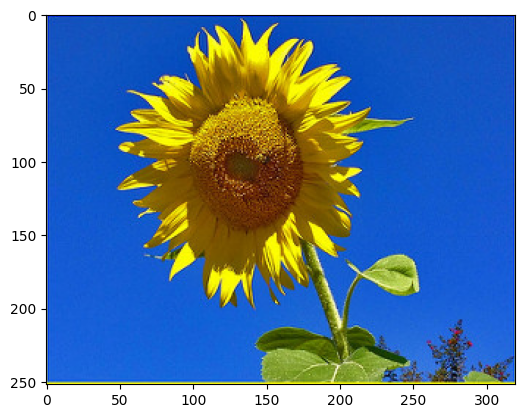

In [41]:
im = Image.open(str(sunflowers[np.random.randint(0, len(sunflowers))]))
plt.imshow(im);

We create a TensorFlow dataset with the data that we have previously loaded to disk with the [`image_dataset_from_directory ()`](https://keras.io/api/preprocessing/image/#image_dataset_from_directory-function)
method.

The `colos_mode` parameter (by default 'rgb') allows you to choose the color scale to use. To automatically load and convert the images to grayscale it must be set as `color_mode = grayscale`.

In [131]:
image_size = (96,96)
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,  # 80%  train, 20% validation
  subset='training',  # 'training' o 'validation', only  with 'validation_split'
  seed=1,
  image_size=image_size,  # Dimension (img_height, img_width) for rescaling
  batch_size=64
)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [132]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset='validation',
  seed=1,
  image_size=image_size,
  batch_size=64)


Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [133]:
class_names_list = train_ds.class_names
class_names_list

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

### Configure the dataset for performance

Let's make sure to use buffered prefetching so you can yield data from disk without having I/O become blocking. These are two important methods you should use when loading data.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch. This will ensure the dataset does not become a bottleneck while training your model. If your dataset is too large to fit into memory, you can also use this method to create a performant on-disk cache.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

Interested readers can learn more about both methods, as well as how to cache data to disk in the [data performance guide](https://www.tensorflow.org/guide/data_performance#prefetching).

In [134]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

Visualizing some training samples.

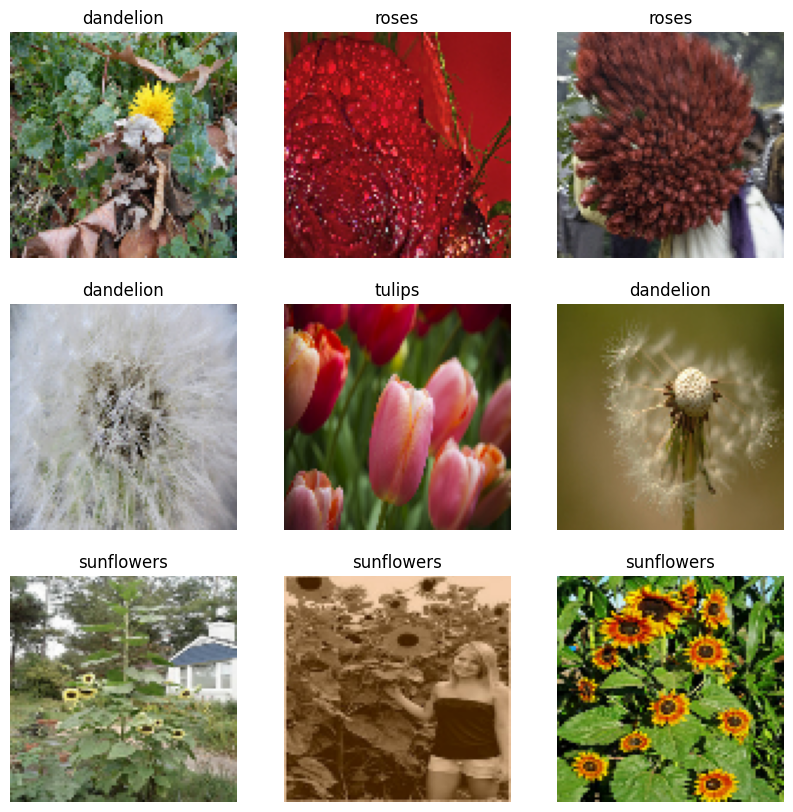

In [135]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names_list[labels[i]])
        plt.axis("off")

We build the model. The **input will have a dimension of (n, n, 3)**, corresponding to (image height, image width, number of color channels).

At the input of the network we include a preprocessing that will allow the images to be rescaled by normalizing the pixel values to a range between 0 and 1.

In [136]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(64, 96, 96, 3)
(64,)


In [137]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

## CNN model in Keras



<img src="https://i.ibb.co/D8CmT6K/cnn.jpg" alt="cnn" border="0">



A Convolutional Neural Network (CNN) architecture has four main parts:

- A **convolutional layer** that extracts features from a source image.

- A **pooling layer** that reduces the image dimensionality without losing important features or patterns.

- A **flattening layer** that transforms a n-dimensional tensor into a vector that can be fed into a fully connected neural network.

- A **fully connected layer** also known as the dense layer.

### Rescaling

For converting the images to   \[0,1\] range.
```python
normalization_layer = layers.Rescaling(1./255)
next_layer = normalization_layer(prev_layer)
```
or simply
```python
reescaling = layers.Rescaling(1. / 255)(inputs)
```

### Convolutional layer

In the convolutional layers (`Conv2D`) we will configure the following parameters:

- **filters**: number of feature maps.
- **kernel_size**: can be either an integer or a tuple of two integers. Specifies the height and width of the kernel.
- **padding**: allows you to include padding in the input data. With 'valid' it is not applied, with 'same' it is configured so that the dimension at the output of the convolution is the same as at the input.
- **activation**: activation function implemented. Recommended ReLU.

[Link to documentation](https://keras.io/api/layers/convolution_layers/convolution2d/)

```python
tf.keras.layers.Conv2D(
    filters, kernel_size, strides=(1, 1), padding='valid',
    activation=None, kernel_regularizer=None)

```

With Functional API:
```python
next_layer = layers.Conv2D(filters=8, kernel_size=3, activation='relu', name='conv_1')(prev_layer)
```

With Sequential:
```python
model.add(layers.Conv2D(filters=8,kernel_size=3, activation='relu', name='conv_1'))
```

### Pooling layer

A pooling layer is a new layer added after the convolutional layer. Specifically, after a nonlinearity ( ReLU) you can choose between [average pooling](https://www.tensorflow.org/api_docs/python/tf/keras/layers/AveragePooling2D) or [max pooling](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D). Usually max pooling is the best choice.


With Functional API:
```python
conv_1 = layers.Conv2D(filters=8, kernel_size=3, activation='relu', name='conv_1')(prev_layer)

pool_1 = layers.MaxPool2D(pool_size=(2, 2), name='pool_1')(conv_1)
```

With Sequential:
```python
model.add(layers.AveragePooling2D(pool_size=(2, 2), name='pool_1'))
```

### Flattening

Prepares a vector for the fully connected layers.

With Functional API:

```python
next_layer = layers.Flatten(name='flatten')(prev_layer)
```

With Sequential:
```python
model.add(layers.Flatten(name='flatten'))
```

There is another alternative for flattening that is a type of pooling that is called global pooling. Global pooling down-samples the entire feature map to a single value.

You can also choose between [GlobalAveragePooling2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/GlobalAveragePooling2D) and [GlobalMaxPooling2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/GlobalMaxPool2D).

```python
model.add(layers.GlobalMaxPool2D(name='GlobalMaxPooling2D'))
```

### Fully-connected layer

Dense layer like a simple neural network

In [138]:
inputs = tf.keras.Input(shape=image_size + (3, ), name='input')
reescaling = layers.Rescaling(1. / 255)(inputs)

# Conv Layer 1
conv_1 = layers.Conv2D(4, 3, padding='valid', activation='relu',
                       name='conv_1')(reescaling)
pool_1 = layers.MaxPooling2D(pool_size=(2, 2), name='pool_1')(conv_1)

# Conv Layer 2
conv_2 = layers.Conv2D(4, 3, padding='valid', activation='relu',
                       name='conv_2')(pool_1)
pool_2 = layers.MaxPooling2D(pool_size=(2, 2), name='pool_2')(conv_2)


# Fully-connected
# Flattening
flat = layers.Flatten(name='flatten')(pool_2)
dense = layers.Dense(64, activation='relu', name='dense')(flat)
outputs = layers.Dense(5, activation='softmax', name='output')(dense)

model = keras.Model(inputs=inputs, outputs=outputs, name='cnn_example')

In [139]:
model.summary()

Model: "cnn_example"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input (InputLayer)              │ (None, 96, 96, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_53 (Rescaling)        │ (None, 96, 96, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_1 (Conv2D)                 │ (None, 94, 94, 4)      │           112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool_1 (MaxPooling2D)           │ (None, 47, 47, 4)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_2 (Conv2D)                 │ (None, 45, 45, 4)      │           148 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool_2 (MaxPooling2D)           │ (None, 22, 22, 4)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1936)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       123,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 124,553 (486.54 KB)

 Trainable params: 124,553 (486.54 KB)

 Non-trainable params: 0 (0.00 B)

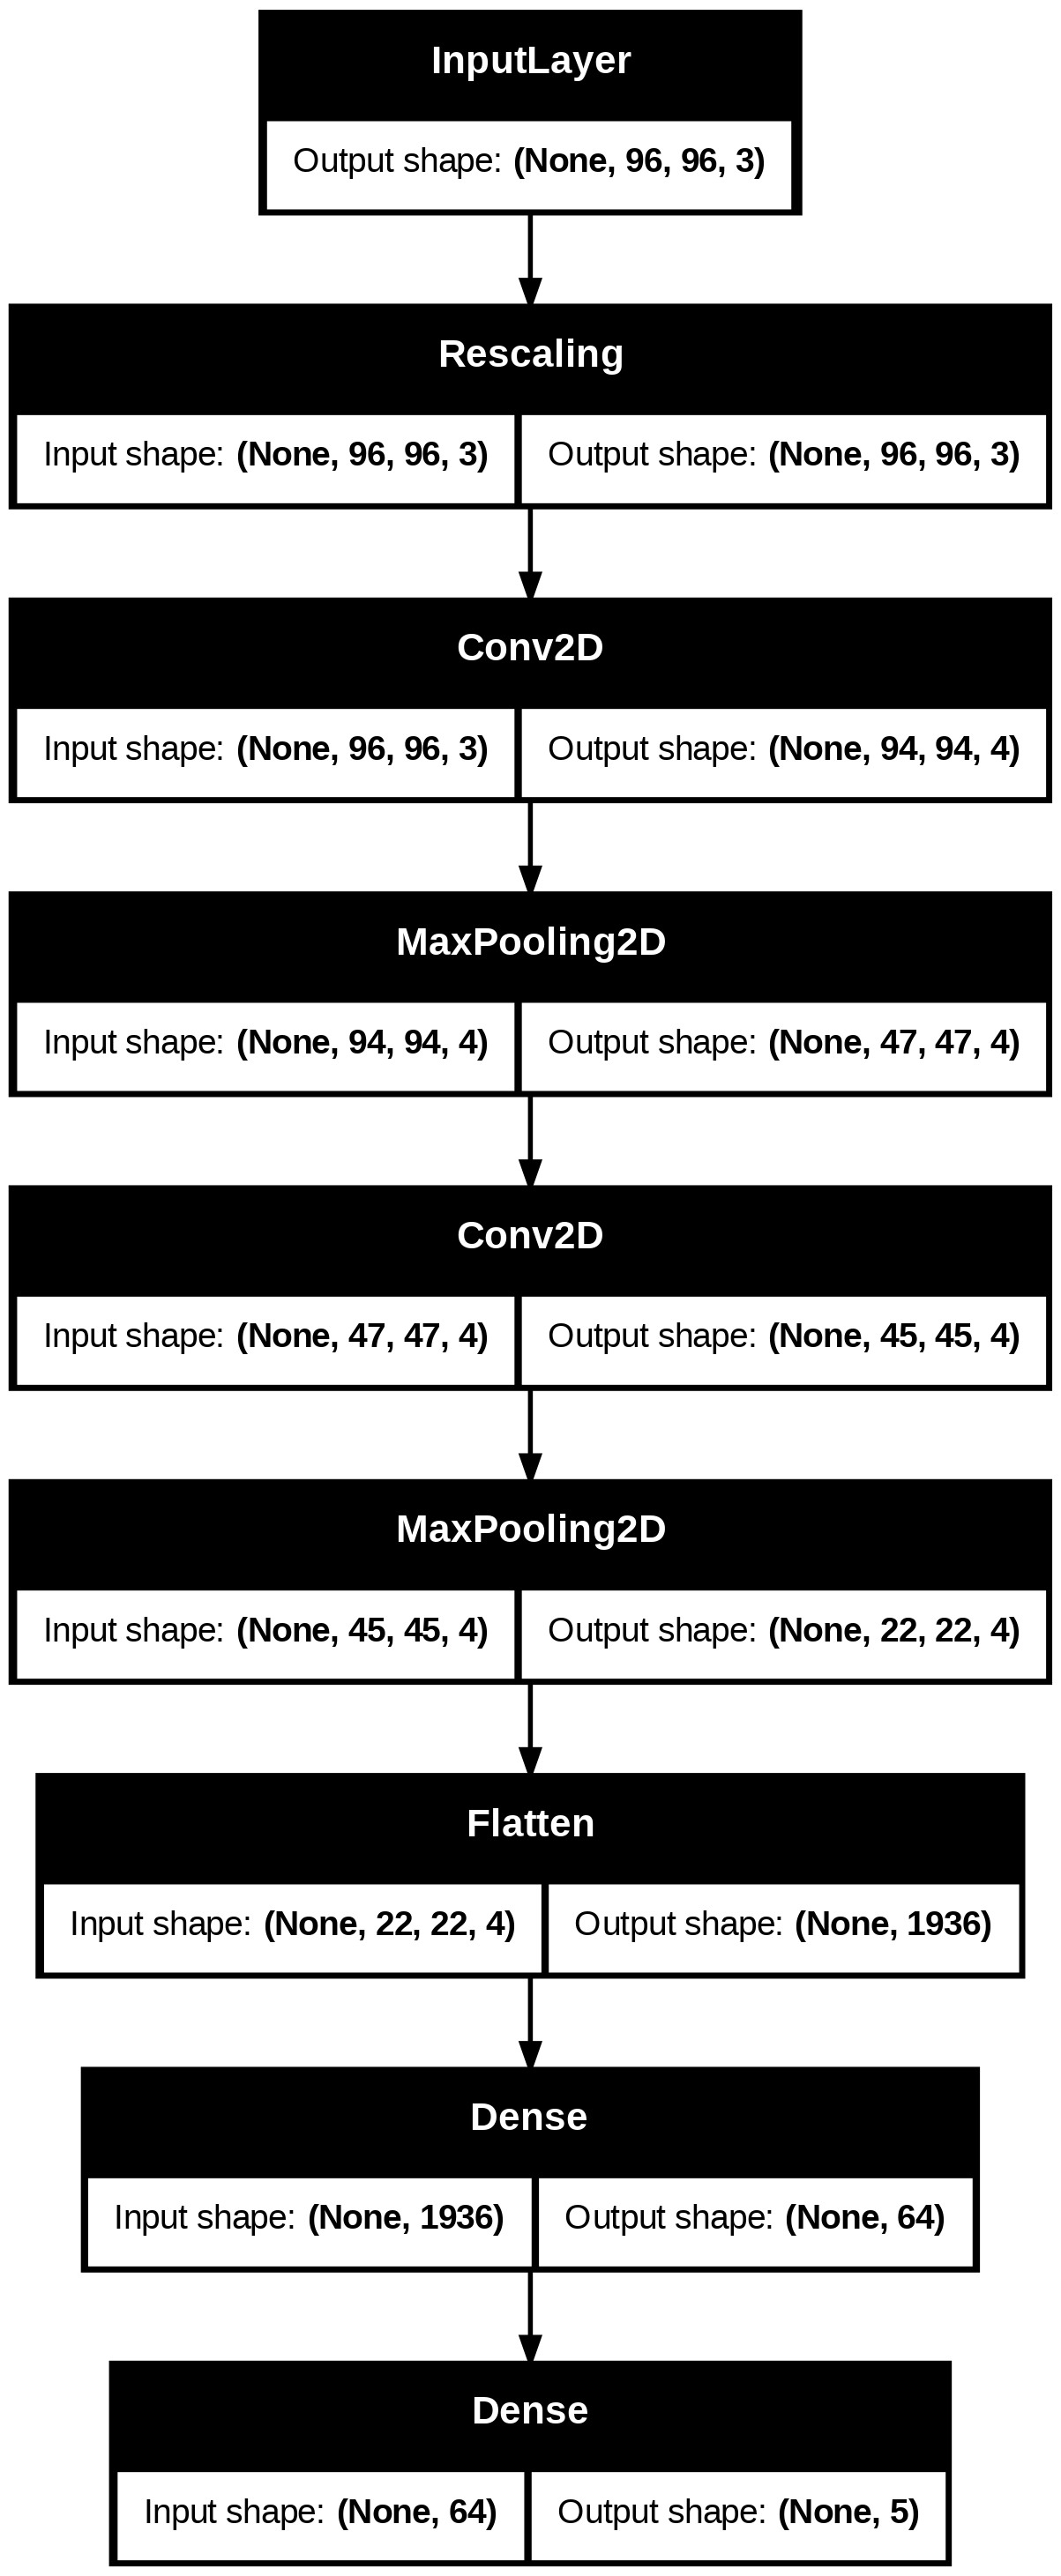

In [140]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

Compile the model

In [141]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

Training the model

In [142]:
epochs = 8
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
)

Epoch 1/8
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - accuracy: 0.3149 - loss: 1.4712 - val_accuracy: 0.4918 - val_loss: 1.2703
Epoch 2/8
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4805 - loss: 1.2559 - val_accuracy: 0.4932 - val_loss: 1.2191
Epoch 3/8
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5231 - loss: 1.1579 - val_accuracy: 0.4946 - val_loss: 1.2375
Epoch 4/8
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5583 - loss: 1.1013 - val_accuracy: 0.5204 - val_loss: 1.1868
Epoch 5/8
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5645 - loss: 1.0705 - val_accuracy: 0.5300 - val_loss: 1.1622
Epoch 6/8
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6105 - loss: 1.0032 - val_accuracy: 0.5354 - val_loss: 1.1429
Epoch 7/8
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6367 - loss: 0.9218 - val_accuracy: 0.5804 - val_loss: 1.0944
Epoch 8/8
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6498 - loss: 0.8768 - val_accuracy: 0.5586 - val_loss: 1.1107

Visualize the results

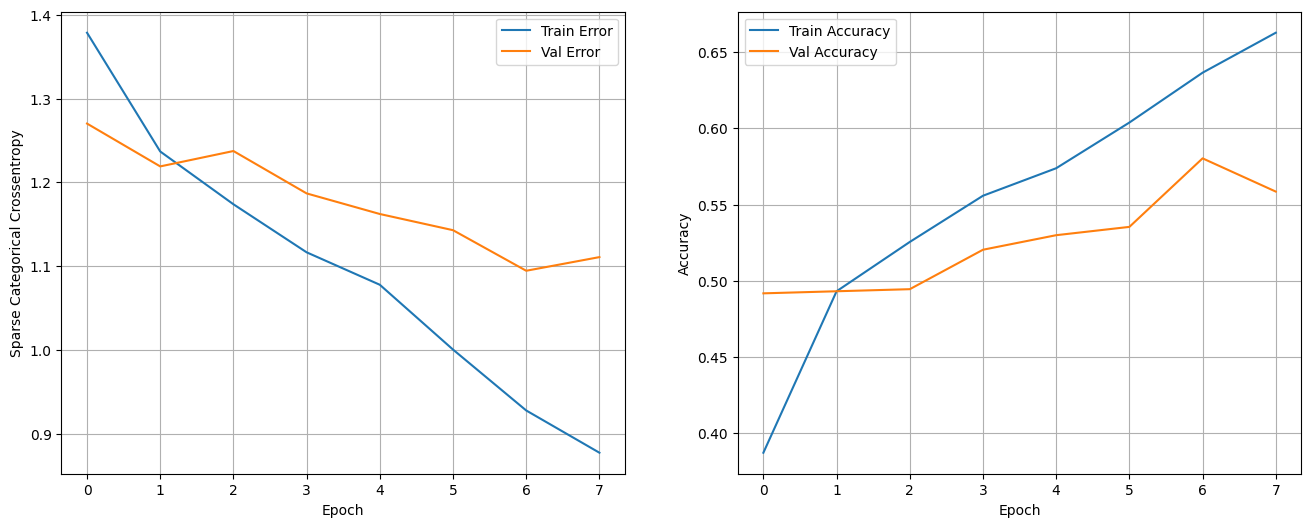

In [143]:
import pandas as pd
def show_loss_accuracy_evolution(history):

    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Sparse Categorical Crossentropy')
    ax1.plot(hist['epoch'], hist['loss'], label='Train Error')
    ax1.plot(hist['epoch'], hist['val_loss'], label = 'Val Error')
    ax1.grid()
    ax1.legend()

    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.plot(hist['epoch'], hist['accuracy'], label='Train Accuracy')
    ax2.plot(hist['epoch'], hist['val_accuracy'], label = 'Val Accuracy')
    ax2.grid()
    ax2.legend()

    plt.show()

show_loss_accuracy_evolution(history)

Plot bad predictions

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step 


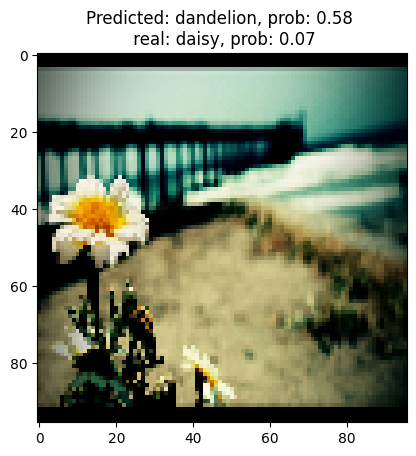

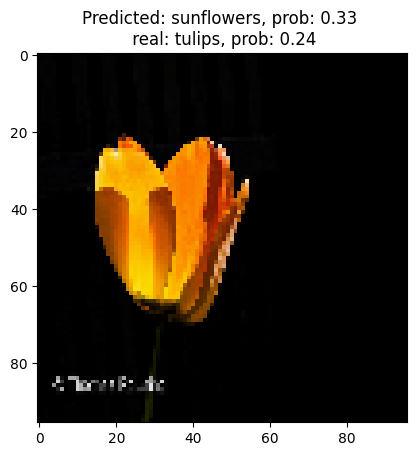

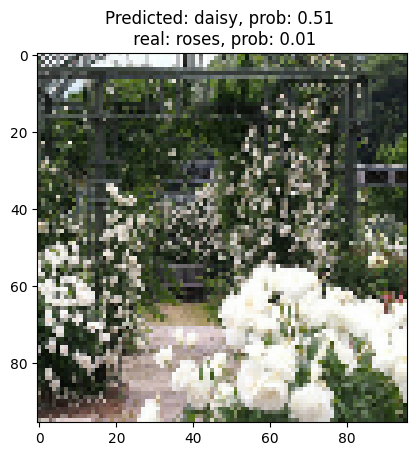

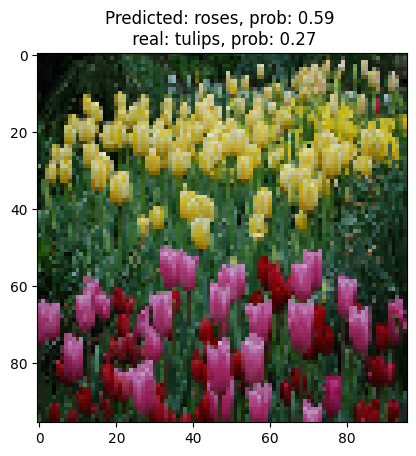

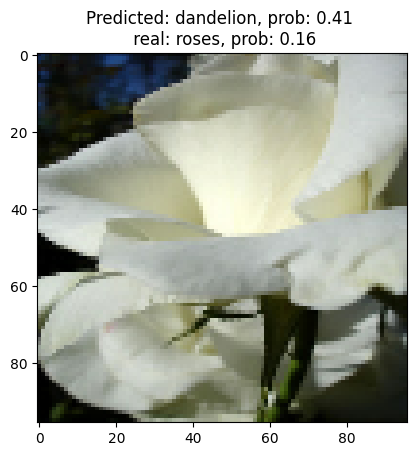

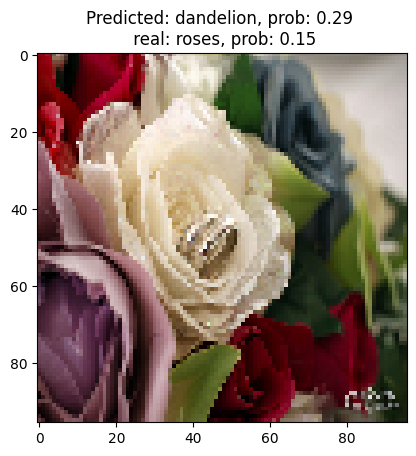

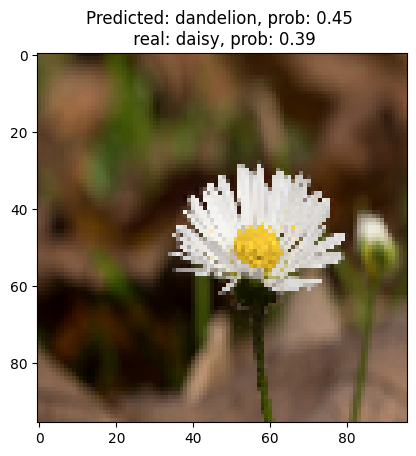

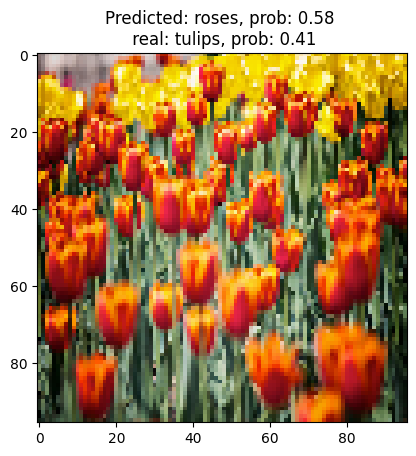

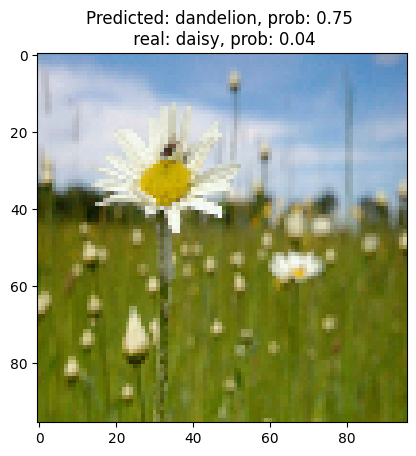

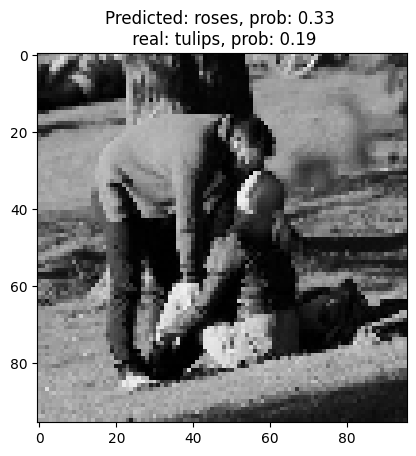

In [144]:
def show_errors(val_ds, model, class_names_list, n_images=5):
    n_plots = 0
    for images, labels in val_ds:
        pred_probs = model.predict(images)
        preds = pred_probs.argmax(axis=-1)
        bad_pred_inds = np.where(preds != labels)[0]
        for ind in list(bad_pred_inds):
            n_plots += 1
            real_class = class_names_list[labels[ind].numpy()]
            pred_class = class_names_list[preds[ind]]
            prob = pred_probs[ind].max()
            prob_real = pred_probs[ind][[
                i for i, c in enumerate(class_names_list) if c == real_class
            ][0]]
            plt.imshow(images[ind].numpy().astype("uint8"))
            plt.title(
                'Predicted: {0}, prob: {1:.2f} \n real: {2}, prob: {3:.2f}'
                .format(pred_class, prob, real_class, prob_real))
            plt.show()

            if n_plots == n_images:
                return
    return


show_errors(val_ds, model, class_names_list, n_images=10)

#### Question 1: What happen with the validation loss and with the number of parameters if you increment the number of filters and the kernel_size ?

Model: "cnn_example"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input (InputLayer)              │ (None, 96, 96, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_54 (Rescaling)        │ (None, 96, 96, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_1 (Conv2D)                 │ (None, 95, 95, 64)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool_1 (MaxPooling2D)           │ (None, 47, 47, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_2 (Conv2D)                 │ (None, 46, 46, 64)     │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool_2 (MaxPooling2D)           │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 33856)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     2,166,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,184,453 (8.33 MB)

 Trainable params: 2,184,453 (8.33 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.3348 - loss: 1.5570 - val_accuracy: 0.5150 - val_loss: 1.1164
Epoch 2/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.5749 - loss: 1.0544 - val_accuracy: 0.6172 - val_loss: 1.0025
Epoch 3/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.6808 - loss: 0.8419 - val_accuracy: 0.6022 - val_loss: 1.0636
Epoch 4/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.7400 - loss: 0.7086 - val_accuracy: 0.6390 - val_loss: 0.9657
Epoch 5/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.8230 - loss: 0.5280 - val_accuracy: 0.6485 - val_loss: 0.9747
Epoch 6/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.8719 - loss: 0.3966 - val_accuracy: 0.6417 - val_loss: 1.0212
Epoch 7/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9328 - loss: 0.2595 - val_accuracy: 0.6240 - val_loss: 1.2192
Epoch 8/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9579 - loss: 0.1651 - val_accuracy: 0.647

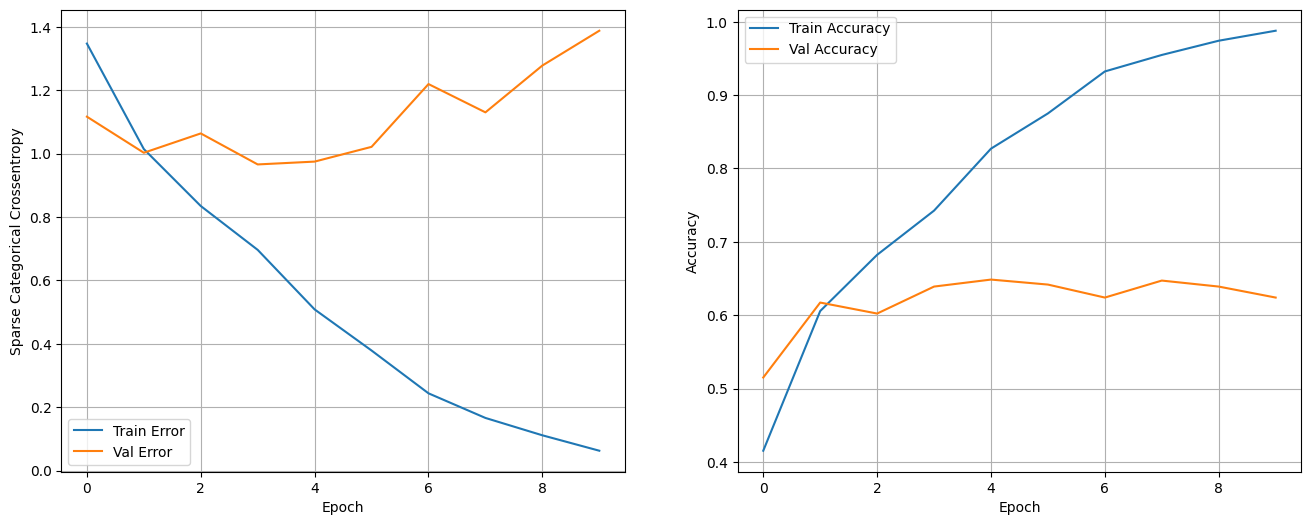

In [145]:
inputs = tf.keras.Input(shape=image_size + (3, ), name='input')
reescaling = layers.Rescaling(1. / 255)(inputs)

# Conv Layer 1
conv_1 = layers.Conv2D(filters=64, kernel_size=2, padding='valid', activation='relu',
                       name='conv_1')(reescaling)
pool_1 = layers.MaxPooling2D(pool_size=(2, 2), name='pool_1')(conv_1)

# Conv Layer 2
conv_2 = layers.Conv2D(filters=64, kernel_size=2, padding='valid', activation='relu',
                       name='conv_2')(pool_1)
pool_2 = layers.MaxPooling2D(pool_size=(2, 2), name='pool_2')(conv_2)


# Fully-connected
# Flattening
flat = layers.Flatten(name='flatten')(pool_2)
dense = layers.Dense(64, activation='relu', name='dense')(flat)
outputs = layers.Dense(5, activation='softmax', name='output')(dense)

model = keras.Model(inputs=inputs, outputs=outputs, name='cnn_example')

print(model.summary())

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

epochs = 10
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
)
show_loss_accuracy_evolution(history)

#### Question 2: What happen with the validation loss and with the number of parameters if you vary  the `pool_size` and the padding of the filters to `same` ?

Model: "cnn_example"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input (InputLayer)              │ (None, 96, 96, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_55 (Rescaling)        │ (None, 96, 96, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_1 (Conv2D)                 │ (None, 95, 95, 64)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool_1 (MaxPooling2D)           │ (None, 31, 31, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_2 (Conv2D)                 │ (None, 30, 30, 64)     │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool_2 (MaxPooling2D)           │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       409,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 427,269 (1.63 MB)

 Trainable params: 427,269 (1.63 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - accuracy: 0.3634 - loss: 1.4535 - val_accuracy: 0.5559 - val_loss: 1.0835
Epoch 2/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.5810 - loss: 1.0357 - val_accuracy: 0.5722 - val_loss: 1.0880
Epoch 3/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.6232 - loss: 0.9544 - val_accuracy: 0.6649 - val_loss: 0.9195
Epoch 4/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.6736 - loss: 0.8348 - val_accuracy: 0.6594 - val_loss: 0.8712
Epoch 5/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7215 - loss: 0.7416 - val_accuracy: 0.7030 - val_loss: 0.8348
Epoch 6/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7410 - loss: 0.6827 - val_accuracy: 0.6580 - val_loss: 0.9108
Epoch 7/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.7765 - loss: 0.6134 - val_accuracy: 0.6703 - val_loss: 0.9105
Epoch 8/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.7833 - loss: 0.5852 - val_accuracy: 0.719

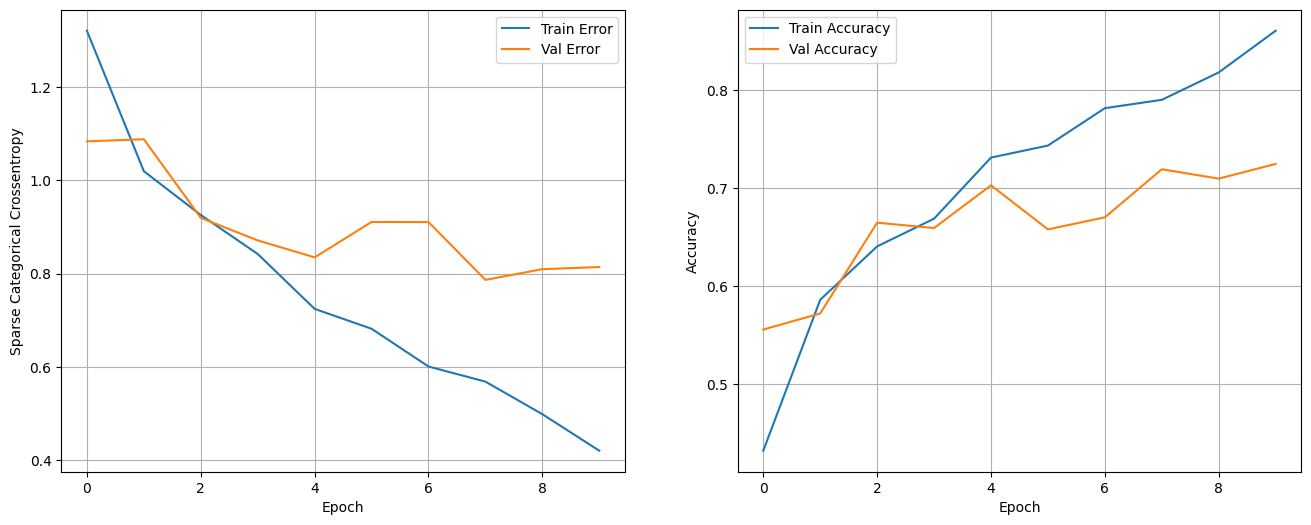

In [146]:
inputs = tf.keras.Input(shape=image_size + (3, ), name='input')
reescaling = layers.Rescaling(1. / 255)(inputs)

# Conv Layer 1
conv_1 = layers.Conv2D(filters=64, kernel_size=2, padding='valid', activation='relu',
                       name='conv_1')(reescaling)
pool_1 = layers.MaxPooling2D(pool_size=(3, 3), name='pool_1')(conv_1)

# Conv Layer 2
conv_2 = layers.Conv2D(filters=64, kernel_size=2, padding='valid', activation='relu',
                       name='conv_2')(pool_1)
pool_2 = layers.MaxPooling2D(pool_size=(3, 3), name='pool_2')(conv_2)

# Fully-connected
# Flattening
flat = layers.Flatten(name='flatten')(pool_2)
dense = layers.Dense(64, activation='relu', name='dense')(flat)
outputs = layers.Dense(5, activation='softmax', name='output')(dense)

model = keras.Model(inputs=inputs, outputs=outputs, name='cnn_example')

print(model.summary())

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

epochs = 10
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
)
show_loss_accuracy_evolution(history)

#### Question 3: Create a model with `val_accuracy > 0.72`

You can use early-stopping callback and dropouts techniques.

```python
next_layer = layers.Dropout(0.4)(prev_layer)
```

```python
next_layer = layers.BatchNormalization()(prev_layer)
```

```python
es_callback = keras.callbacks.EarlyStopping(
    monitor='val_loss',  # can be 'val_accuracy'
    patience=5,  # if during 5 epochs there is no improvement in `val_loss`, the execution will stop
    verbose=1)
```

Model: "cnn_example"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input (InputLayer)              │ (None, 96, 96, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_56 (Rescaling)        │ (None, 96, 96, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_1 (Conv2D)                 │ (None, 95, 95, 64)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool_1 (MaxPooling2D)           │ (None, 31, 31, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool_1_dp (Dropout)             │ (None, 31, 31, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_2 (Conv2D)                 │ (None, 30, 30, 64)     │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool_2 (MaxPooling2D)           │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool_2_dp (Dropout)             │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       409,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_38          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 427,525 (1.63 MB)

 Trainable params: 427,397 (1.63 MB)

 Non-trainable params: 128 (512.00 B)

None
Epoch 1/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 8s 94ms/step - accuracy: 0.3286 - loss: 1.6501 - val_accuracy: 0.4510 - val_loss: 1.3271
Epoch 2/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.5070 - loss: 1.1669 - val_accuracy: 0.5204 - val_loss: 1.1877
Epoch 3/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.5934 - loss: 1.0081 - val_accuracy: 0.5518 - val_loss: 1.1747
Epoch 4/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.6661 - loss: 0.8900 - val_accuracy: 0.5082 - val_loss: 1.2015
Epoch 5/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.7029 - loss: 0.7929 - val_accuracy: 0.4782 - val_loss: 1.2043
Epoch 6/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.7264 - loss: 0.7661 - val_accuracy: 0.5150 - val_loss: 1.1164
Epoch 7/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.7321 - loss: 0.7126 - val_accuracy: 0.5150 - val_loss: 1.1014
Epoch 8/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.7597 - loss: 0.6438 - val_accuracy: 0.583

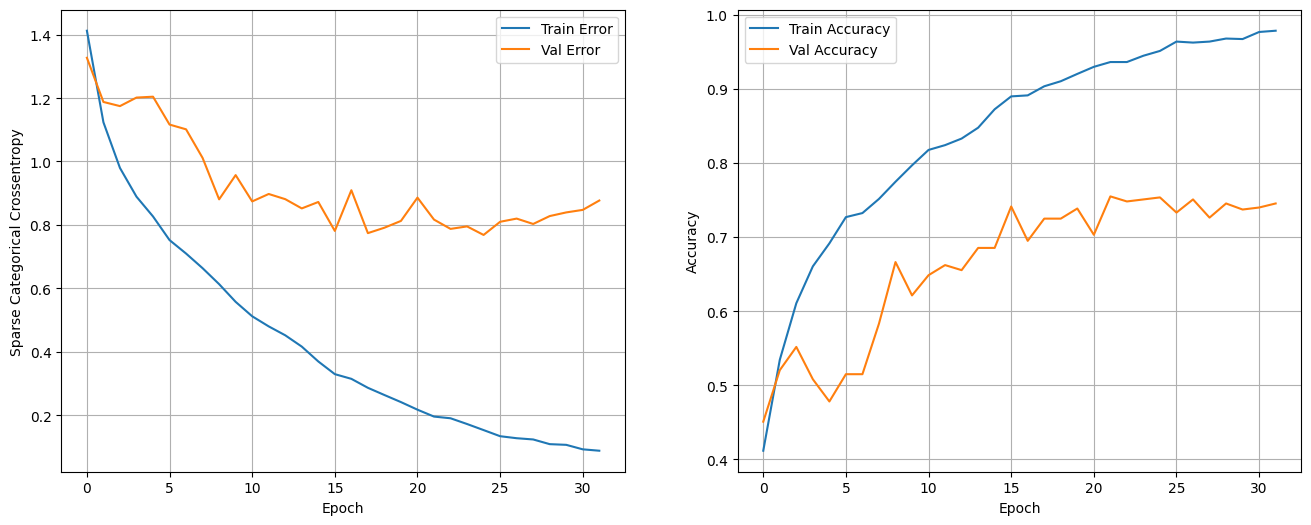

In [147]:
inputs = tf.keras.Input(shape=image_size + (3, ), name='input')
reescaling = layers.Rescaling(1. / 255)(inputs)

# Conv Layer 1
conv_1 = layers.Conv2D(filters=64, kernel_size=2, padding='valid', activation='relu',
                       name='conv_1')(reescaling)
pool_1 = layers.MaxPooling2D(pool_size=(3, 3), name='pool_1')(conv_1)
pool_1 = layers.Dropout(0.4, name='pool_1_dp')(pool_1) # funciona guay
#pool_1 = layers.BatchNormalization()(pool_1) # Empeora bastante el resultado

# Conv Layer 2
conv_2 = layers.Conv2D(filters=64, kernel_size=2, padding='valid', activation='relu',
                       name='conv_2')(pool_1)
pool_2 = layers.MaxPooling2D(pool_size=(3, 3), name='pool_2')(conv_2)
pool_2 = layers.Dropout(0.4, name='pool_2_dp')(pool_2) # funciona guay
#pool_2 = layers.BatchNormalization()(pool_2) # Empeora bastante el resultado

# Fully-connected
# Flattening
flat = layers.Flatten(name='flatten')(pool_2)
dense = layers.Dense(64, activation='relu', name='dense')(flat)
#dense = layers.Dropout(0.4, name='dense_dp')(dense) # Aquí no aporta tanto
dense = layers.BatchNormalization()(dense) # Aquí parece que funciona guay
outputs = layers.Dense(5, activation='softmax', name='output')(dense)
model = keras.Model(inputs=inputs, outputs=outputs, name='cnn_example')
print(model.summary())


model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)


es_callback = keras.callbacks.EarlyStopping(
    monitor='val_loss',  # can be 'val_accuracy'
    patience=7,  # if during 7 epochs there is no improvement in `val_loss`, the execution will stop
    restore_best_weights=True,
    verbose=1)


epochs = 50
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
    callbacks=[es_callback]
)

show_loss_accuracy_evolution(history)

In [148]:
# Resultados
results = model.evaluate(val_ds, verbose=0)
print('Test Loss: {}'.format(results[0]))
print('Test Accuracy: {}'.format(results[1]))

Test Loss: 0.7683614492416382
Test Accuracy: 0.7534059882164001


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step 


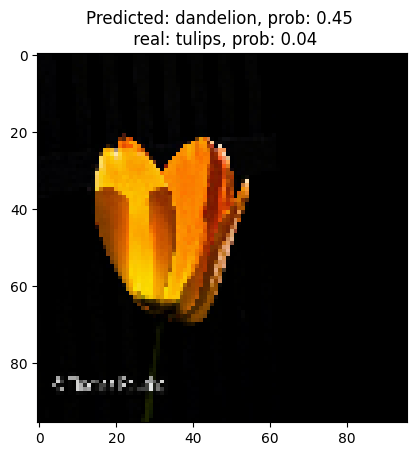

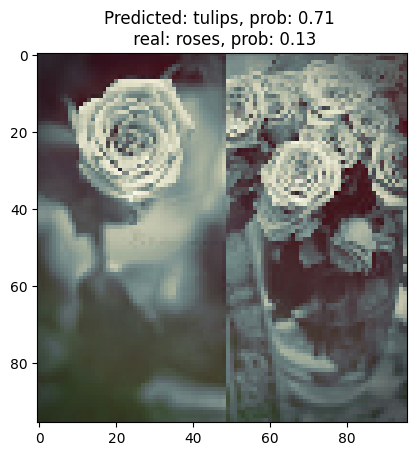

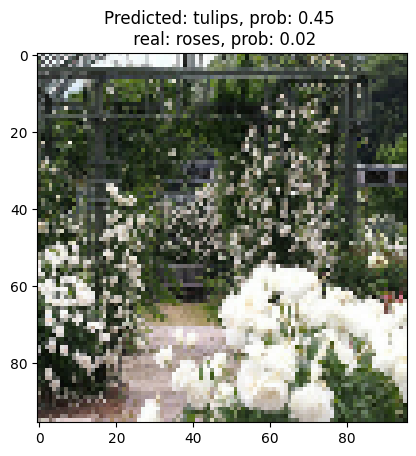

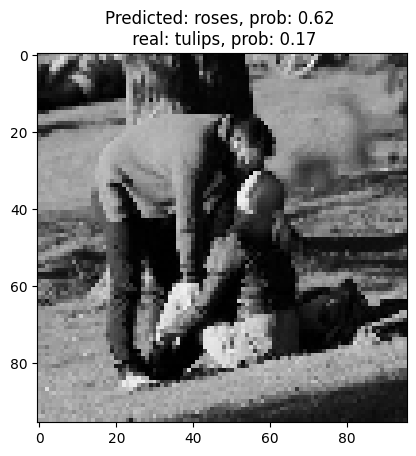

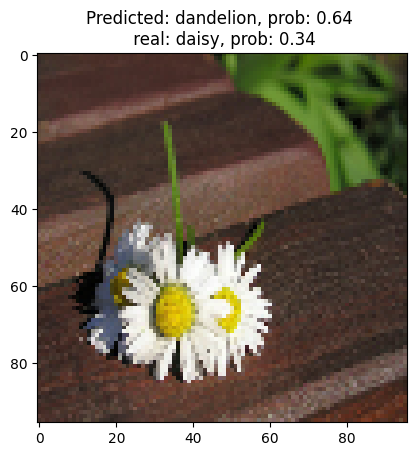

In [149]:
show_errors(val_ds, model, class_names_list, n_images=5)

### Data Augmentation

[**data augmentation**](https://en.wikipedia.org/wiki/Data_augmentation) We transform randomly the training images.

Data augmentation can be done before starting any training directly on the available image set, or working with the [Keras layers for that purpose](https://www.tensorflow.org/tutorials/images/data_augmentation). In that example we will do it the second way by randomly rotating, flipping and scaling the images.

In [150]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.25),
    layers.RandomZoom(0.25),
    layers.RandomContrast(0.1),
    layers.RandomBrightness(factor=0.2)
  ]
)

Some examples

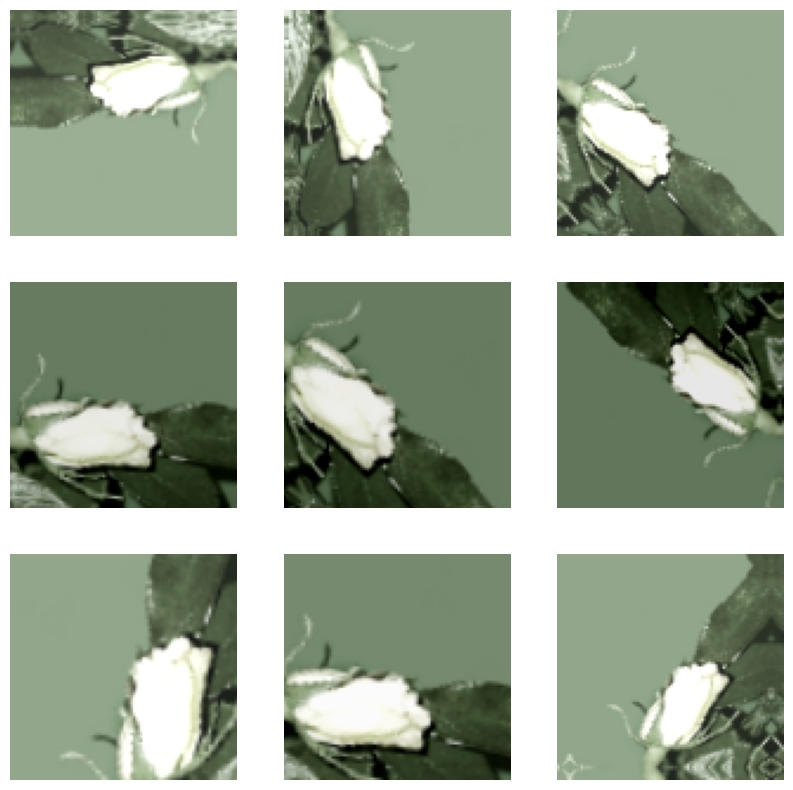

In [151]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images, training=True)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

We include the stage that performs the transformations in the images at the beginning of the model that we built previously, we repeat the training and visualize the results.

In [152]:
inputs = tf.keras.Input(shape=image_size + (3, ), name='input')
data_aug = data_augmentation(inputs)
reescaling = layers.Rescaling(1. / 255)(data_aug)

# Conv Layer 1
conv_1 = layers.Conv2D(8, 3, padding='valid', activation='relu',
                       name='conv_1')(reescaling)
pool_1 = layers.MaxPooling2D(pool_size=(2, 2), name='pool_1')(conv_1)

# Conv Layer 2
conv_2 = layers.Conv2D(8, 3, padding='valid', activation='relu',
                       name='conv_2')(pool_1)
pool_2 = layers.MaxPooling2D(name='pool_2')(conv_2)

# Conv Layer 3
conv_3 = layers.Conv2D(8,
                       3,
                       padding='valid',
                       activation='relu',
                       name='conv_3')(pool_2)
pool_3 = layers.MaxPooling2D(name='pool_3')(conv_3)

# Fully-connected
flat = layers.Flatten(name='flatten')(pool_3)
dense = layers.Dense(64, activation='relu', name='dense')(flat)
outputs = layers.Dense(5, activation='softmax', name='output')(dense)

model = keras.Model(inputs=inputs, outputs=outputs, name='cnn_example')

Epoch 1/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.2560 - loss: 1.5971 - val_accuracy: 0.3706 - val_loss: 1.4002
Epoch 2/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4100 - loss: 1.3682 - val_accuracy: 0.4687 - val_loss: 1.2532
Epoch 3/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4497 - loss: 1.2771 - val_accuracy: 0.4932 - val_loss: 1.2735
Epoch 4/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5146 - loss: 1.1586 - val_accuracy: 0.5232 - val_loss: 1.1795
Epoch 5/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5525 - loss: 1.1112 - val_accuracy: 0.5531 - val_loss: 1.1599
Epoch 6/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5794 - loss: 1.0629 - val_accuracy: 0.5736 - val_loss: 1.1230
Epoch 7/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5813 - loss: 1.0350 - val_accuracy: 0.5981 - val_loss: 1.0936
Epoch 8/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6077 - loss: 1.0075 - val_accuracy: 0.4741 - val_lo

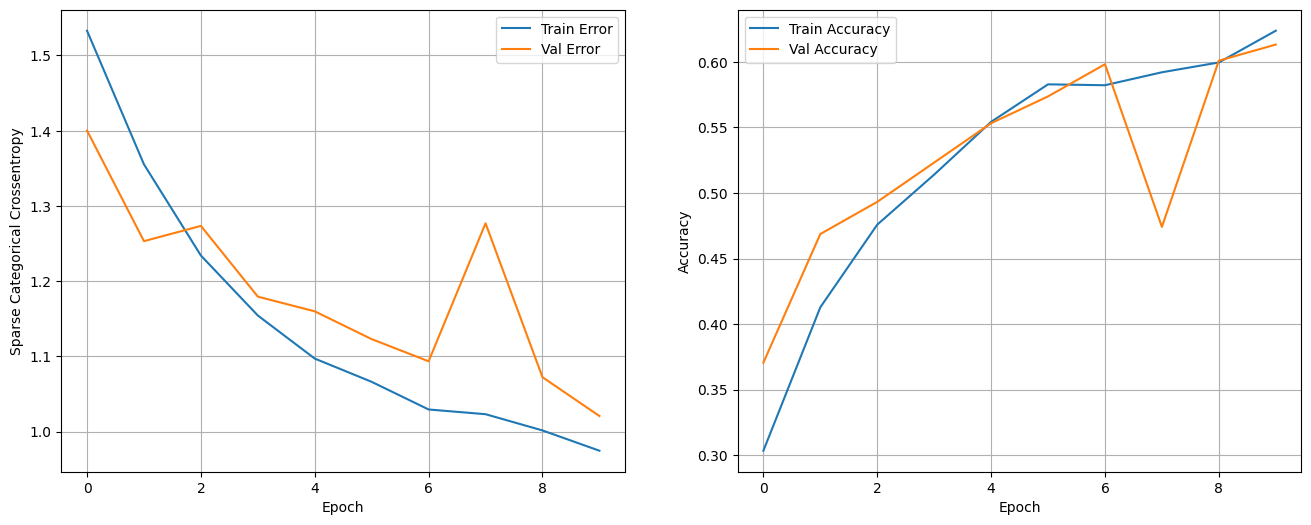

In [153]:
es_callback = keras.callbacks.EarlyStopping(
    monitor='val_loss',  # can be 'val_accuracy'
    patience=10,  # if during 5 epochs there is no improvement in `val_loss`, the execution will stop
    verbose=1)

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

epochs = 10
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
    callbacks=[es_callback]
)
show_loss_accuracy_evolution(history)

#### Question 4: Use the best model you have found and include the `data_aug` layer, compare the results

Model: "cnn_example"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input (InputLayer)              │ (None, 96, 96, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential (Sequential)         │ (None, 96, 96, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_59 (Rescaling)        │ (None, 96, 96, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_1 (Conv2D)                 │ (None, 95, 95, 64)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool_1 (MaxPooling2D)           │ (None, 31, 31, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool_1_dp (Dropout)             │ (None, 31, 31, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_2 (Conv2D)                 │ (None, 30, 30, 64)     │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool_2 (MaxPooling2D)           │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool_2_dp (Dropout)             │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       409,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_40          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 427,525 (1.63 MB)

 Trainable params: 427,397 (1.63 MB)

 Non-trainable params: 128 (512.00 B)

None
Epoch 1/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.3444 - loss: 1.6129 - val_accuracy: 0.4087 - val_loss: 1.3391
Epoch 2/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.4946 - loss: 1.1983 - val_accuracy: 0.5368 - val_loss: 1.1786
Epoch 3/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.5300 - loss: 1.1229 - val_accuracy: 0.5450 - val_loss: 1.1489
Epoch 4/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.5591 - loss: 1.0633 - val_accuracy: 0.6090 - val_loss: 1.0271
Epoch 5/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.5723 - loss: 1.0428 - val_accuracy: 0.6008 - val_loss: 1.0225
Epoch 6/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.5914 - loss: 0.9980 - val_accuracy: 0.5940 - val_loss: 1.0269
Epoch 7/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.6233 - loss: 0.9624 - val_accuracy: 0.6226 - val_loss: 0.9662
Epoch 8/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.6247 - loss: 0.9375 - val_accuracy: 0.599

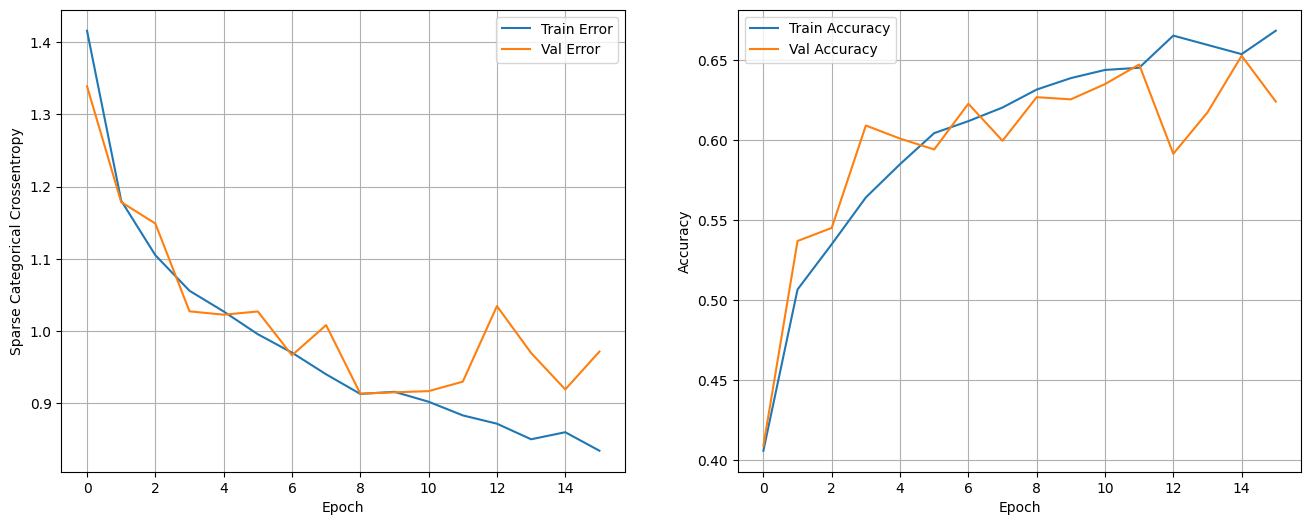

Test Loss: 0.9130337238311768
Test Accuracy: 0.6267030239105225


In [155]:
inputs = tf.keras.Input(shape=image_size + (3, ), name='input')
data_aug = data_augmentation(inputs)
reescaling = layers.Rescaling(1. / 255)(data_aug)

# Conv Layer 1
conv_1 = layers.Conv2D(filters=64, kernel_size=2, padding='valid', activation='relu',
                       name='conv_1')(reescaling)
pool_1 = layers.MaxPooling2D(pool_size=(3, 3), name='pool_1')(conv_1)
pool_1 = layers.Dropout(0.4, name='pool_1_dp')(pool_1) # funciona guay
#pool_1 = layers.BatchNormalization()(pool_1) # Empeora bastante el resultado

# Conv Layer 2
conv_2 = layers.Conv2D(filters=64, kernel_size=2, padding='valid', activation='relu',
                       name='conv_2')(pool_1)
pool_2 = layers.MaxPooling2D(pool_size=(3, 3), name='pool_2')(conv_2)
pool_2 = layers.Dropout(0.4, name='pool_2_dp')(pool_2) # funciona guay
#pool_2 = layers.BatchNormalization()(pool_2) # Empeora bastante el resultado

# Fully-connected
# Flattening
flat = layers.Flatten(name='flatten')(pool_2)
dense = layers.Dense(64, activation='relu', name='dense')(flat)
#dense = layers.Dropout(0.4, name='dense_dp')(dense) # Aquí no aporta tanto
dense = layers.BatchNormalization()(dense) # Aquí parece que funciona guay
outputs = layers.Dense(5, activation='softmax', name='output')(dense)
model = keras.Model(inputs=inputs, outputs=outputs, name='cnn_example')
print(model.summary())


model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)


es_callback = keras.callbacks.EarlyStopping(
    monitor='val_loss',  # can be 'val_accuracy'
    patience=7,  # if during 7 epochs there is no improvement in `val_loss`, the execution will stop
    restore_best_weights=True,
    verbose=1)

epochs = 50
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
    callbacks=[es_callback]
)

show_loss_accuracy_evolution(history)

# Resultados
results = model.evaluate(val_ds, verbose=0)
print('Test Loss: {}'.format(results[0]))
print('Test Accuracy: {}'.format(results[1]))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step 


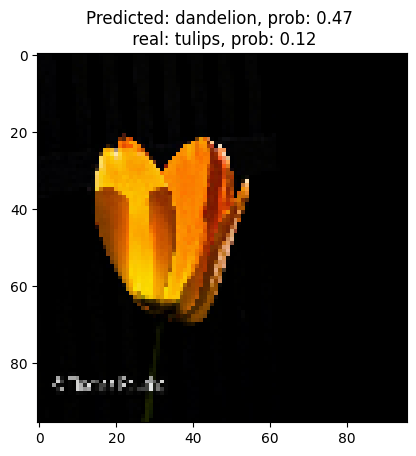

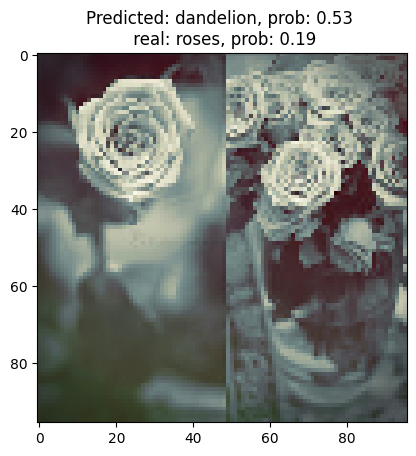

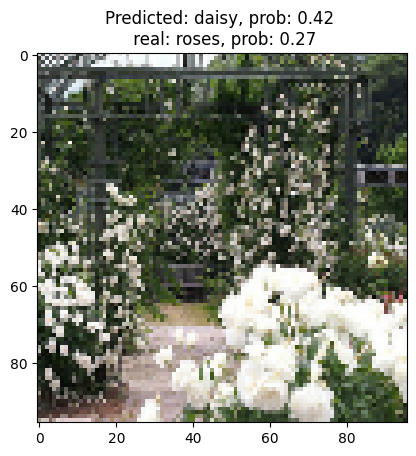

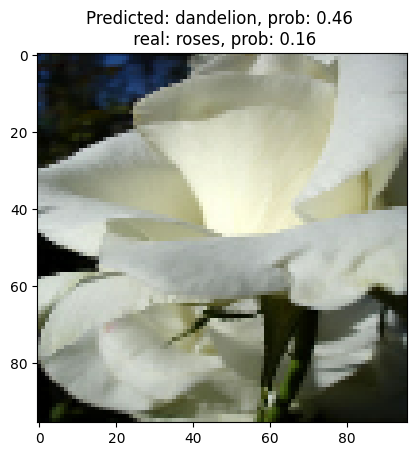

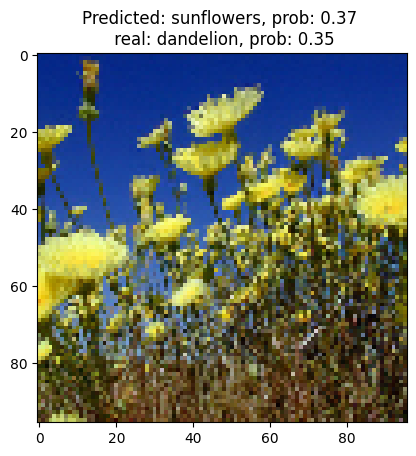

In [156]:
show_errors(val_ds, model, class_names_list, n_images=5)

## Transfer learning

With transfer learning, you benefit from both advanced convolutional neural network architectures developed by top researchers and from pre-training on a huge dataset of images. In our case we will be transfer learning from a network trained on ImageNet, a database of images containing many plants and outdoors scenes, which is close enough to flowers.

<img src="https://i.ibb.co/KsLSGyt/transfer-learning.png" alt="transfer-learning" border="0">

[MobileNetV2](https://arxiv.org/abs/1801.04381) is a significant improvement over MobileNetV1 and pushes the state of the art for mobile visual recognition including classification, object detection and semantic segmentation.

In [`tf.keras.applications`](https://www.tensorflow.org/api_docs/python/tf/keras/applications) you have many pre-trained models. You can compare them [here](https://keras.io/api/applications/#available-models).

With the parameter `include_top=false`, you can delete the last `softmax` layer.

With `pretrained_model.trainable = False`, you freeze the pre-trained model weights.

In [157]:
pretrained_model = tf.keras.applications.MobileNetV2(input_shape=image_size+(3,), include_top=False)
pretrained_model.trainable = False
pretrained_model.summary()

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "mobilenetv2_1.00_96"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 96, 96, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 48, 48,    │        864 │ input_layer_1[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 48, 48,    │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 48, 48,    │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 48, 48,    │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 48, 48,    │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 48, 48,    │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 48, 48,    │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 48, 48,    │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 48, 48,    │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 48, 48,    │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 48, 48,    │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 49, 49,    │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 24, 24,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 24, 24,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 24, 24,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 24, 24,    │      2,304 │ block_1_depthwis

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 2,257,984 (8.61 MB)

We need to use the same **preprocessing** as in the model

In [159]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

You define your new model adding more layers

In [160]:
inputs = tf.keras.Input(shape=image_size + (3, ), name='input')

# pre-trained model
x = preprocess_input(inputs)
x = pretrained_model(x)

# classifier
flat = tf.keras.layers.Flatten()(x)
flat = tf.keras.layers.Dropout(0.5)(flat)
outputs = tf.keras.layers.Dense(5, activation='softmax')(flat)

model_tl = tf.keras.Model(inputs, outputs)
model_tl.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input (InputLayer)              │ (None, 96, 96, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ true_divide (TrueDivide)        │ (None, 96, 96, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ subtract (Subtract)             │ (None, 96, 96, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_96             │ (None, 3, 3, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 11520)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 11520)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 5)              │        57,605 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,315,589 (8.83 MB)

 Trainable params: 57,605 (225.02 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [161]:
model_tl.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [162]:
epochs = 5
history = model_tl.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/5
46/46 ━━━━━━━━━━━━━━━━━━━━ 20s 248ms/step - accuracy: 0.6169 - loss: 1.4101 - val_accuracy: 0.8311 - val_loss: 0.6368
Epoch 2/5
46/46 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.8530 - loss: 0.4582 - val_accuracy: 0.8311 - val_loss: 0.6516
Epoch 3/5
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9277 - loss: 0.2287 - val_accuracy: 0.8569 - val_loss: 0.5962
Epoch 4/5
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9498 - loss: 0.1411 - val_accuracy: 0.8501 - val_loss: 0.6606
Epoch 5/5
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9544 - loss: 0.1114 - val_accuracy: 0.8706 - val_loss: 0.6736


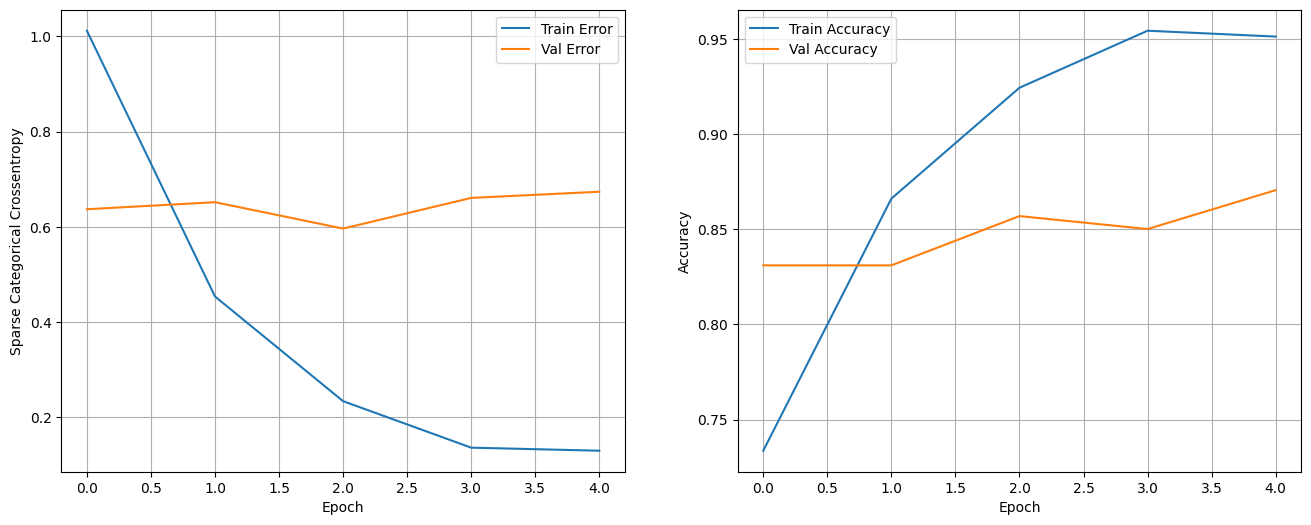

In [163]:
show_loss_accuracy_evolution(history)

2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step


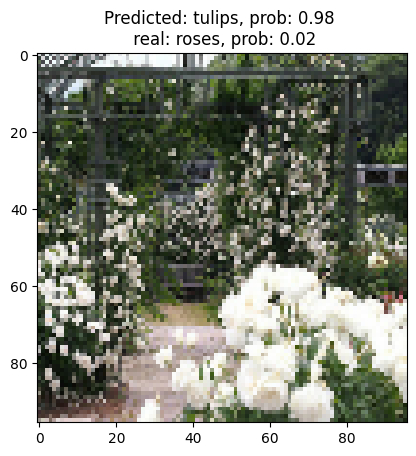

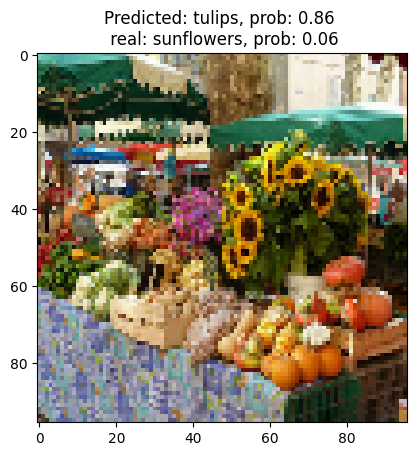

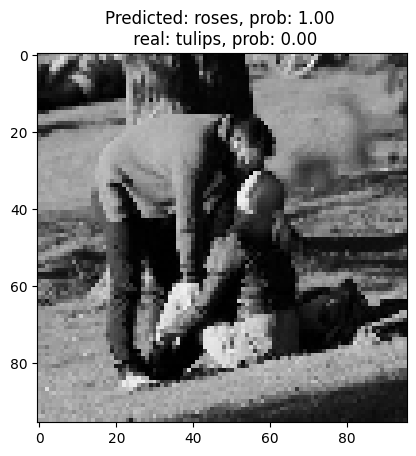

In [164]:
show_errors(val_ds, model_tl, class_names_list, n_images=3)

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model_tl, show_shapes=True)

In [165]:
inputs = tf.keras.Input(shape=image_size+(3, ), name='input')

#data_aug = data_augmentation(inputs)
reescaling = preprocess_input(inputs)

# Conv Layer 1
conv_1 = layers.Conv2D(32, 2, padding='valid',
                       activation='relu', name='conv_1')(reescaling)
pool_1 = layers.MaxPooling2D(pool_size=(2, 2),  name='pool_1')(conv_1)
pool_1 = layers.Dropout(0.4)(pool_1)

# Conv Layer 2
conv_2 = layers.Conv2D(32, 2, padding='valid',
                       activation='relu', name='conv_2')(pool_1)
pool_2 = layers.MaxPooling2D(pool_size=(2, 2), name='pool_2')(conv_2)
pool_2 = layers.Dropout(0.4)(pool_2)

# Conv Layer 3
conv_3 = layers.Conv2D(16, 3, padding='valid',
                       activation='relu', name='conv_3')(pool_2)
pool_3 = layers.MaxPooling2D(name='pool_3')(conv_3)
pool_3 = layers.Dropout(0.4)(pool_3)

# Fully-connected
x1 = layers.Flatten(name='flatten')(pool_3)

x2 = pretrained_model(reescaling, training=False)
x2 = tf.keras.layers.Flatten()(x2)

x = tf.keras.layers.Concatenate()([x1, x2])
x = layers.Dropout(0.4)(x)
x = layers.Dense(64, activation='relu', name='dense')(x)
# A Dense classifier with a single unit (binary classification
outputs = tf.keras.layers.Dense(5, activation='softmax')(x)
model_tl = keras.Model(inputs, outputs)

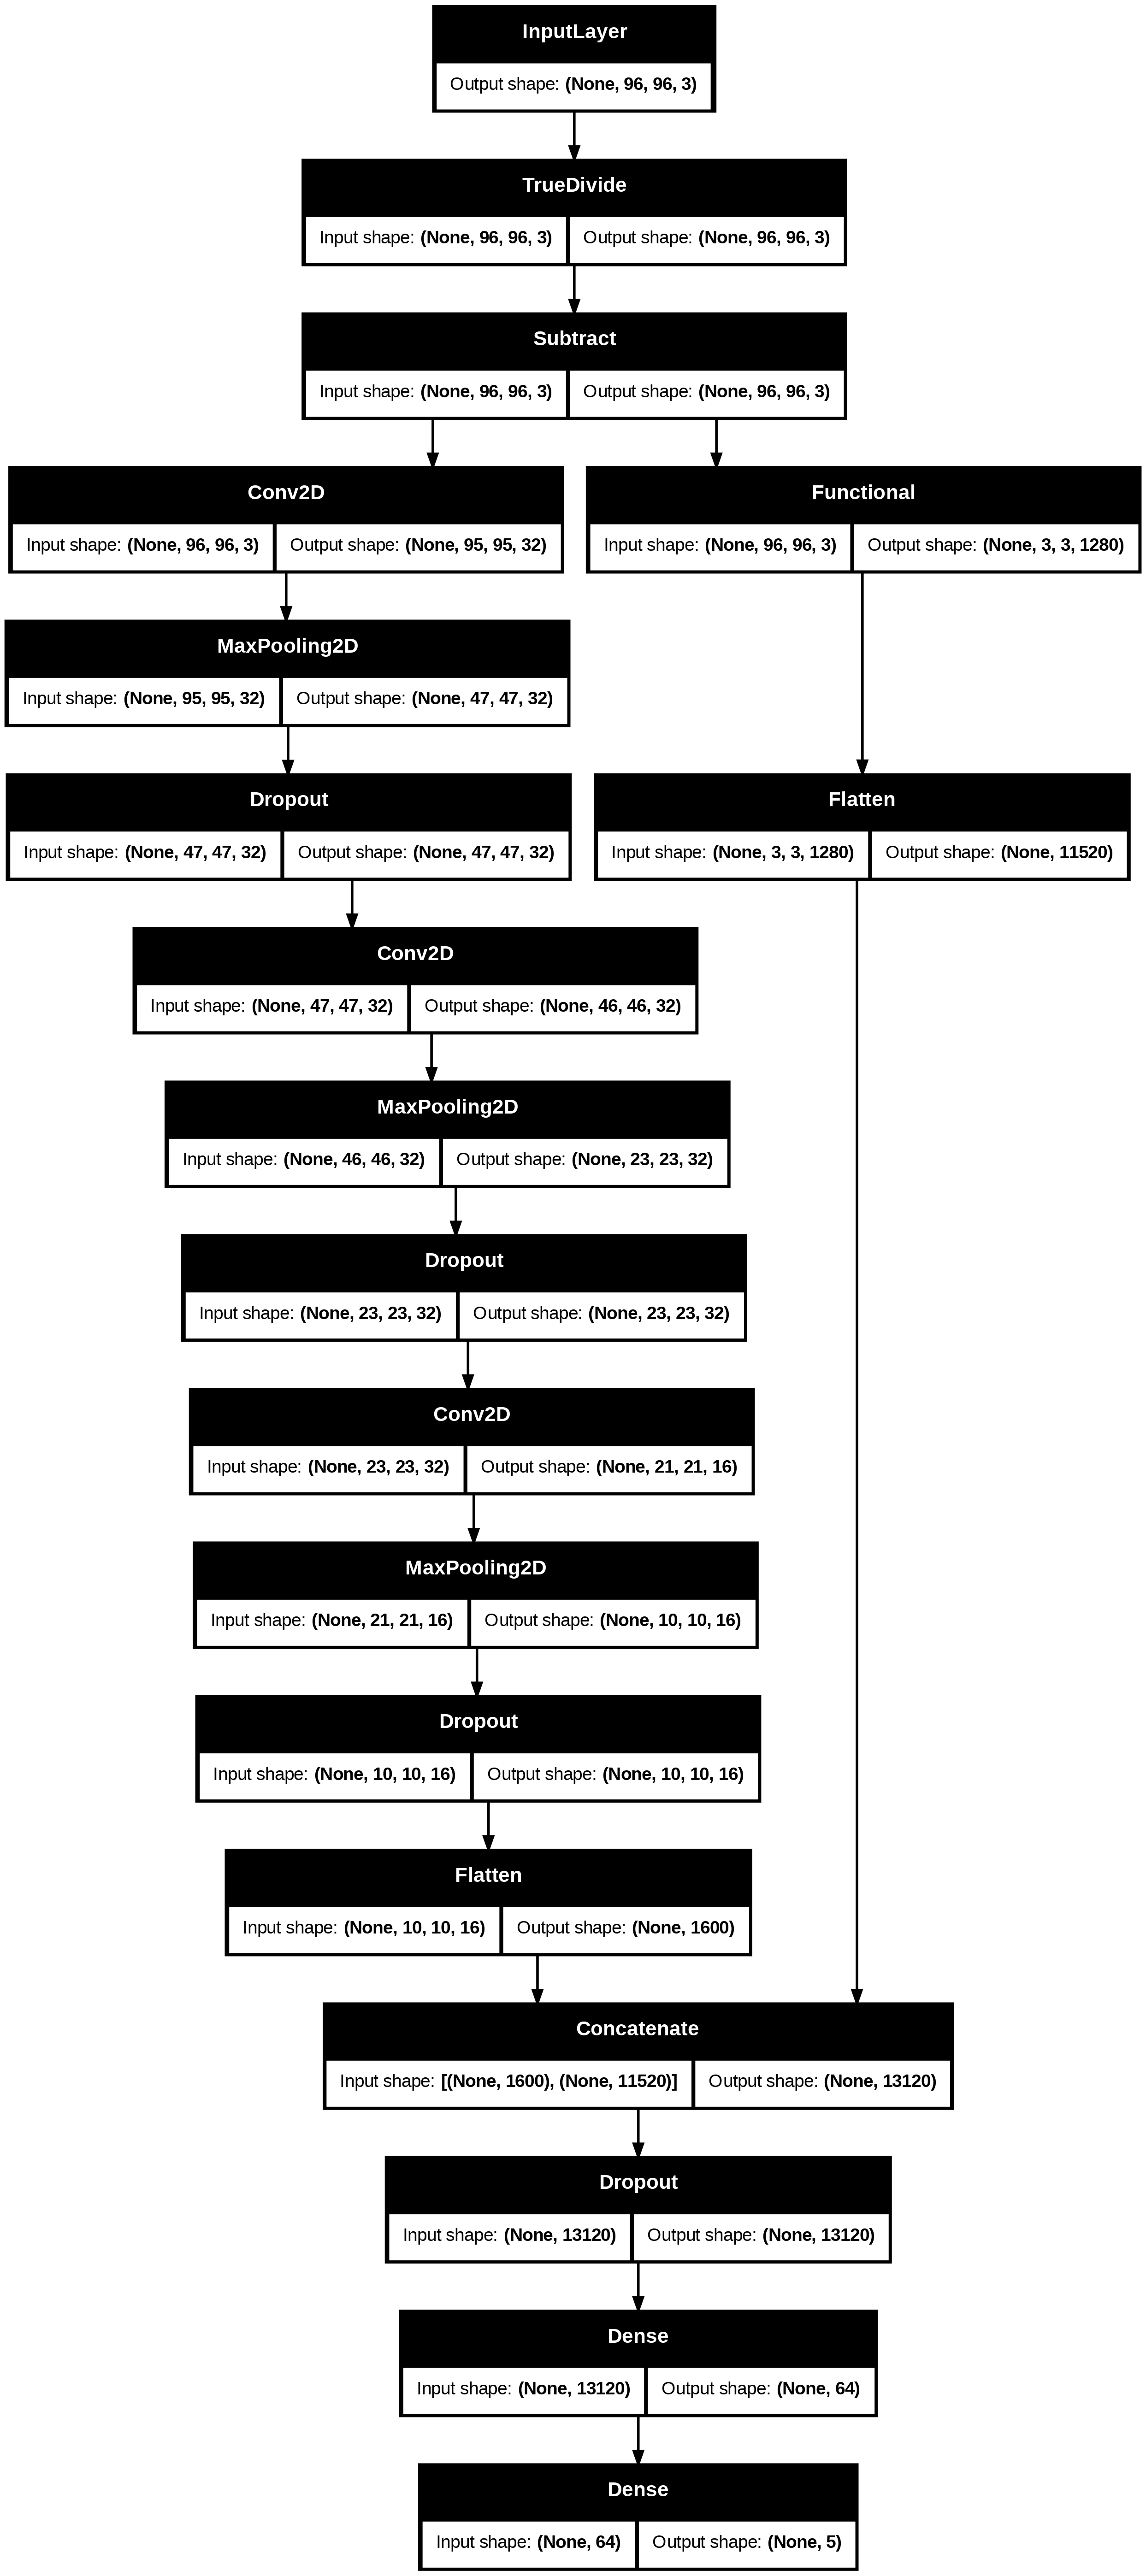

In [166]:
from tensorflow.keras.utils import plot_model
plot_model(model_tl, show_shapes=True)

In [167]:
model_tl.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)
epochs = 15
history = model_tl.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 27s 300ms/step - accuracy: 0.6239 - loss: 1.4170 - val_accuracy: 0.8515 - val_loss: 0.4222
Epoch 2/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9070 - loss: 0.2498 - val_accuracy: 0.8488 - val_loss: 0.4090
Epoch 3/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9705 - loss: 0.1082 - val_accuracy: 0.8651 - val_loss: 0.4589
Epoch 4/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9774 - loss: 0.0680 - val_accuracy: 0.8447 - val_loss: 0.5474
Epoch 5/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9877 - loss: 0.0411 - val_accuracy: 0.8706 - val_loss: 0.5430
Epoch 6/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9941 - loss: 0.0258 - val_accuracy: 0.8733 - val_loss: 0.5100
Epoch 7/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9932 - loss: 0.0245 - val_accuracy: 0.8678 - val_loss: 0.5487
Epoch 8/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.9990 - loss: 0.0120 - val_accuracy: 0.8665 -

In [ ]:
show_errors(val_ds, model_tl, class_names_list, n_images=3)

### Fine-tuning

In [ ]:
epochs = 20
model_tl = tf.keras.Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    tf.keras.applications.MobileNetV2(input_shape=image_size+(3, ), include_top=False),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(5, activation='softmax')
])
model_tl.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)
history = model_tl.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

## Practice: Fashion MNIST Try to obtain  `Test Accuracy>0.89`!!

Fashion MNIST dataset contains 70,000 grayscale images with 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels).

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="300">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

**Categories**:
<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

In [168]:
# Load the dataset
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

print('train_images shape: {0}, test_images shape: {1}'.format(
    train_images.shape, test_images.shape))

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
train_images shape: (60000, 28, 28), test_images shape: (10000, 28, 28)


In [169]:
class_names = [
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt',
    'Sneaker', 'Bag', 'Ankle boot'
]

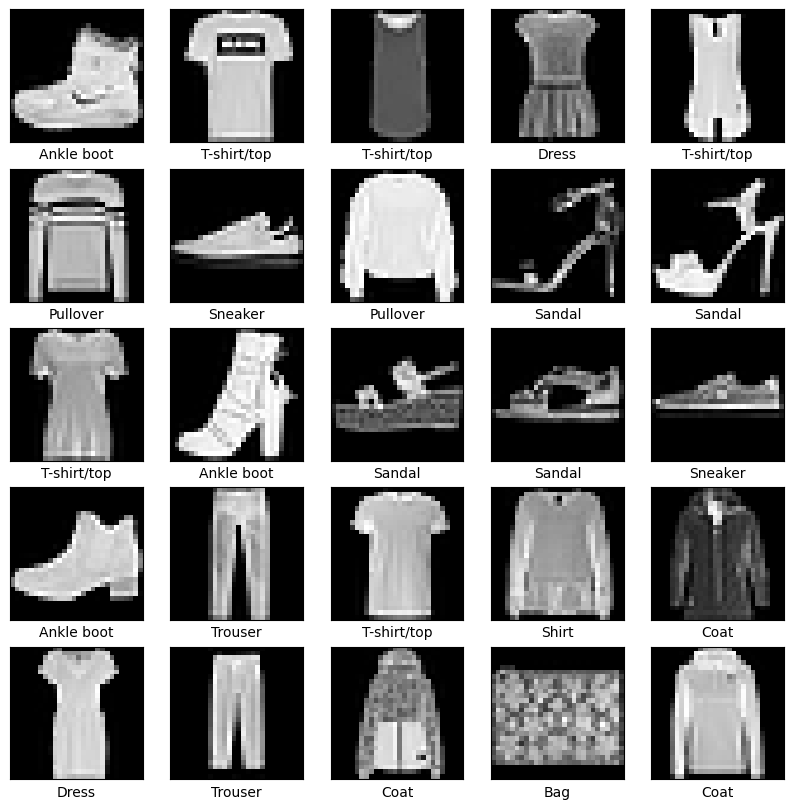

In [170]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap='gray')
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [172]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip(),
    layers.RandomRotation(0.25),
  ]
)


Model: "cnn_mnist"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input (InputLayer)              │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_64 (Rescaling)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 27, 27, 128)    │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 9, 9, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_29 (Dropout)            │ (None, 9, 9, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 128)      │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_45          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 73,482 (287.04 KB)

 Trainable params: 72,458 (283.04 KB)

 Non-trainable params: 1,024 (4.00 KB)

Epoch 1/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.7002 - loss: 0.8297 - val_accuracy: 0.8225 - val_loss: 0.4760
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - accuracy: 0.8282 - loss: 0.4812 - val_accuracy: 0.8388 - val_loss: 0.4408
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8395 - loss: 0.4375 - val_accuracy: 0.8493 - val_loss: 0.4083
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8483 - loss: 0.4215 - val_accuracy: 0.8572 - val_loss: 0.3893
Epoch 5/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8531 - loss: 0.4078 - val_accuracy: 0.8639 - val_loss: 0.3726
Epoch 6/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8559 - loss: 0.3992 - val_accuracy: 0.8669 - val_loss: 0.3598
Epoch 7/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8580 - loss: 0.3848 - val_accuracy: 0.8683 - val_loss: 0.3648
Epoch 8/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8613 - loss: 0.374

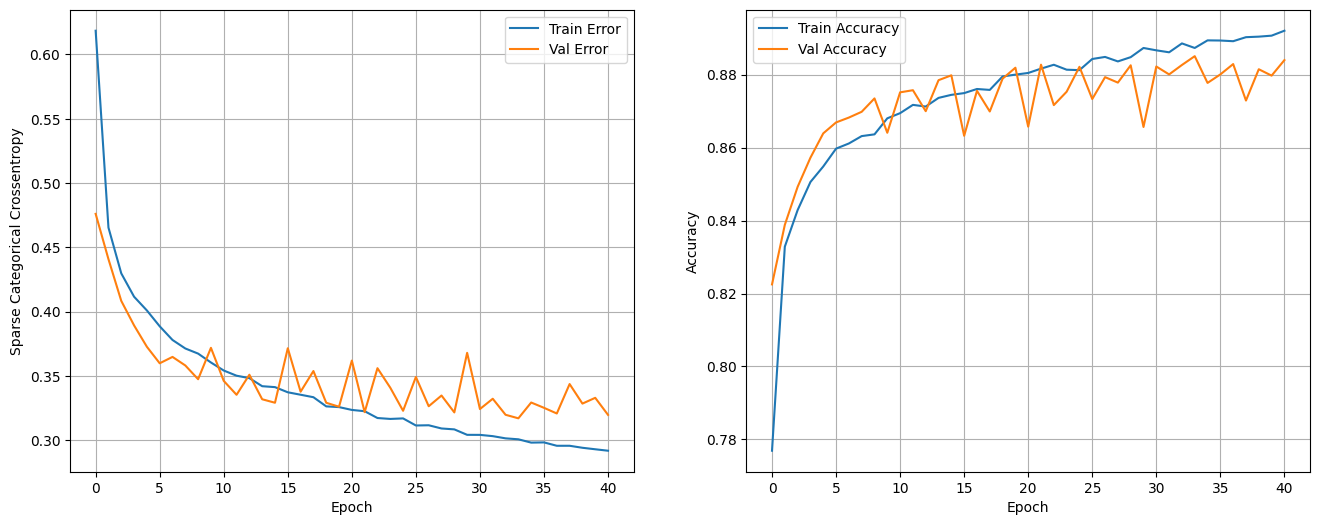

Test Loss: 0.3307
Test Accuracy: 0.8813


In [177]:
# Inputs
inputs = tf.keras.Input(shape=(28, 28, 1), name='input')

# Data Augmentation (optional)
# aug = data_augmentation(inputs)
# rescaling = layers.Rescaling(1. / 255)(aug)

# Normalization
rescaling = layers.Rescaling(1. / 255)(inputs)

# Conv Layer 1
conv_1 = layers.Conv2D(128, kernel_size=2, padding='valid', activation='relu')(rescaling)
pool_1 = layers.MaxPooling2D(pool_size=(3, 3))(conv_1)
dp_1 = layers.Dropout(0.5, name='dp_1')(pool_1)

# Conv Layer 2
conv_2 = layers.Conv2D(128, kernel_size=2, padding='valid', activation='relu')(dp_1)
pool_2 = layers.MaxPooling2D(pool_size=(3, 3))(conv_2)
dp_2 = layers.Dropout(0.5, name='dp_2')(pool_2)

# Conv Layer 3 (opcional)
# conv_3 = layers.Conv2D(64, kernel_size=3, padding='same', activation='relu')(dp_2)
# pool_3 = layers.MaxPooling2D(pool_size=(2, 2))(conv_3)
# dp_3 = layers.Dropout(0.4)(pool_3)

# Fully-connected
flat = layers.Flatten()(pool_2)
batch_norm = layers.BatchNormalization()(flat)
dense = layers.Dense(64, activation='relu')(batch_norm)
outputs = layers.Dense(10, activation='softmax')(batch_norm)

model = keras.Model(inputs=inputs, outputs=outputs, name='cnn_mnist')
model.summary()

# Compile
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

# Callback
es_callback = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=7,
    restore_best_weights=True,
    verbose=1
)

# Train
history = model.fit(
    train_images, train_labels,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    callbacks=[es_callback]
)

# Plot metrics
show_loss_accuracy_evolution(history)

# Evaluate
results = model.evaluate(test_images, test_labels, verbose=0)
print(f'Test Loss: {results[0]:.4f}')
print(f'Test Accuracy: {results[1]:.4f}')


### Plotting predictions

In [178]:
predictions = model.predict(test_images)
predicted_classes = np.argmax(predictions, -1)
predictions.shape, predicted_classes.shape
predictions[i,:]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([1.4261085e-06, 9.9984324e-01, 1.2256071e-06, 1.2372629e-04,
       1.3142765e-06, 5.6648610e-09, 2.9023542e-05, 3.2314162e-10,
       4.3278053e-08, 4.9167742e-08], dtype=float32)

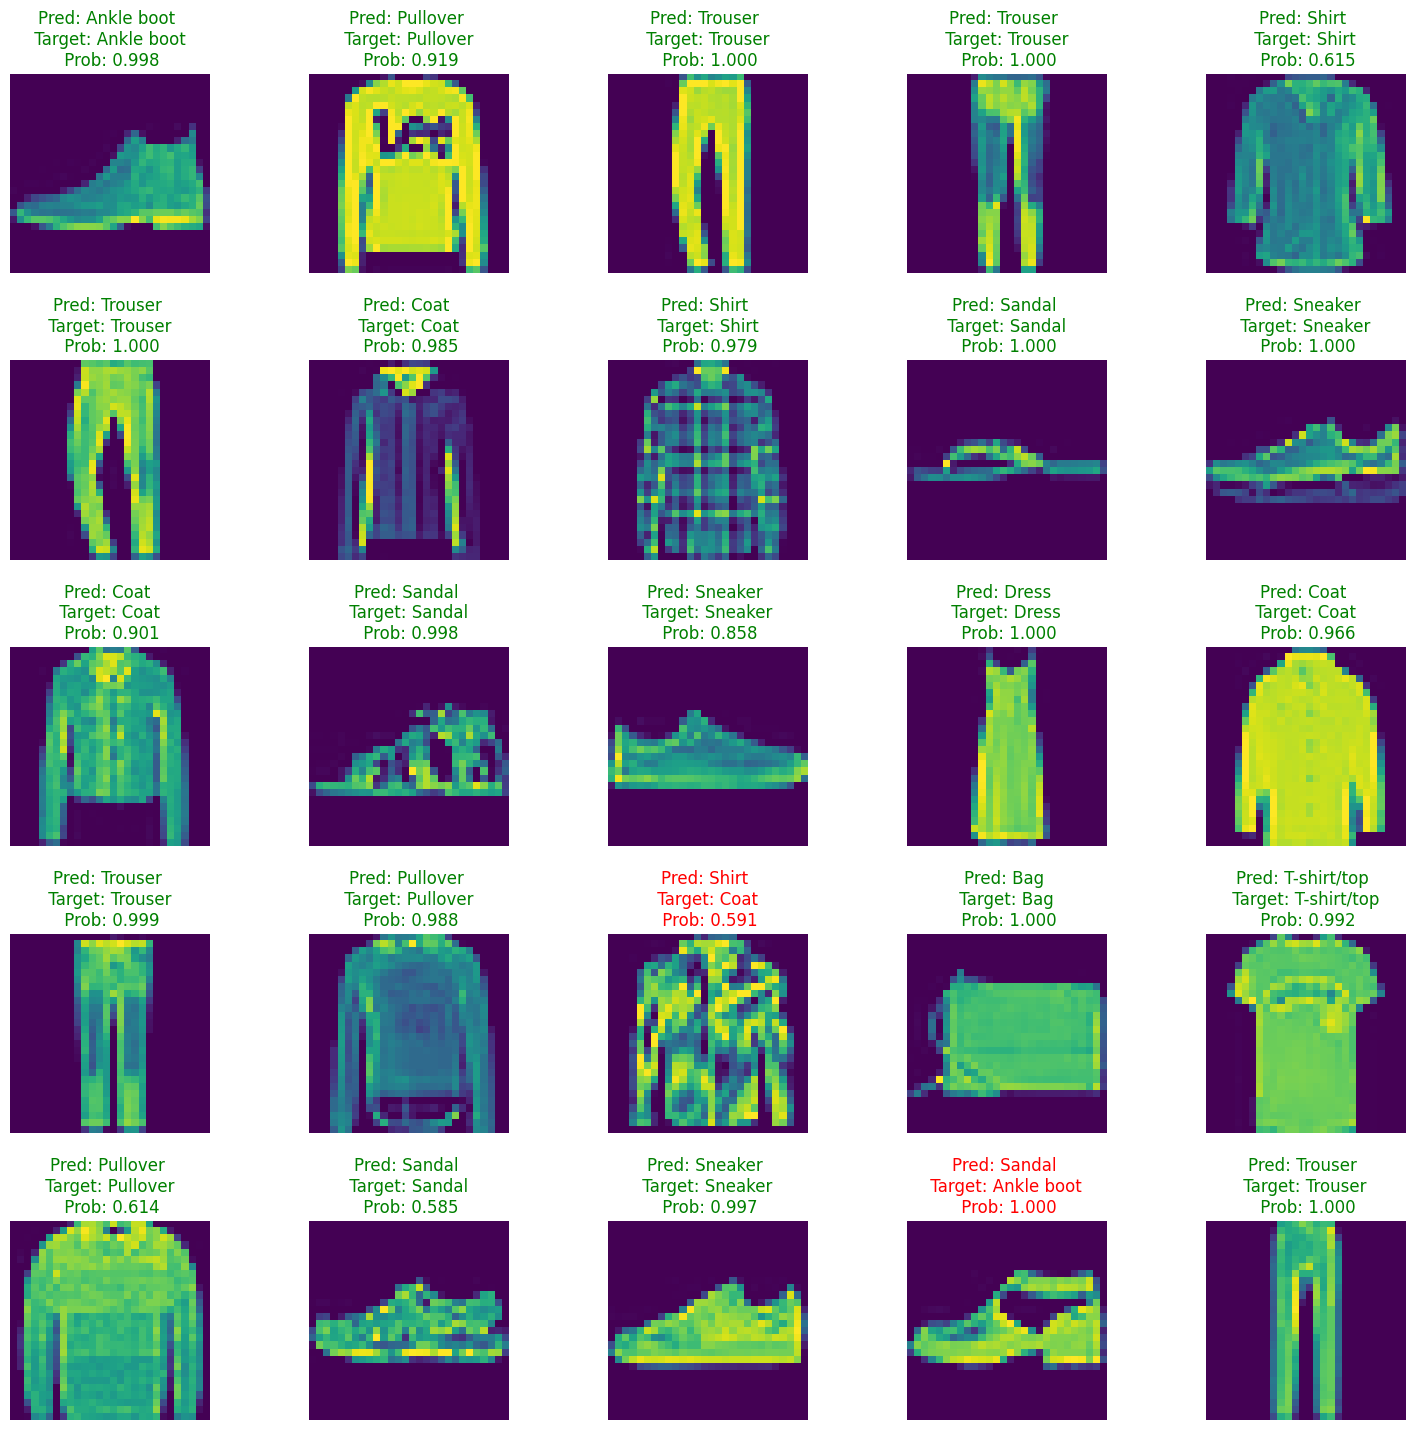

In [179]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize=(18, 18))
axes = axes.ravel()

for i in np.arange(0, L * W):
    axes[i].imshow(test_images[i].reshape(28, 28))
    prob_pred = np.max(predictions[i, :])
    class_pred = class_names[int(predicted_classes[i])]
    original_class = class_names[int(test_labels[i])]
    if class_pred == original_class:
        color = 'green'
    else:
        color = 'red'
    title = "Pred: {0} \n Target: {1} \n Prob: {2:.3f}".format(
    class_pred, original_class, prob_pred)
    axes[i].set_title(title, color=color)
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)